# Data Inspection for AirBnB Dataset
## West Region of the U.S
  - Seattle
  - LA
  - SF
  - Portland
  - Clark county NV


## Procedure

1. Basic Structure (# of Rows and Columns)

2. Missing Values
  - By column
  - By City

3. Data Types

4. Unique Values by Column

5. EDA Plots

## Function for the Inspection

### 1. Simple EDA

**Purpose:**
The simple_eda function is designed to perform a basic exploratory data analysis (EDA) on a given DataFrame. It provides essential insights into the structure, missing values, data types, unique values, and summary statistics of the DataFrame.

Steps:
1. **Basic Structure:**

Prints the number of rows and columns in the DataFrame.

2. **Missing Values:**

Prints the count of missing values for each column in the DataFrame.

3. **Data Types:**

Prints the data types of each column in the DataFrame.

4. **Unique Values by Column:**

Prints the number of unique values for each column in the DataFrame.

5. **Summary Statistics for Numerical Columns:**

Provides summary statistics (count, mean, std, min, 25%, 50%, 75%, max) for numerical columns in the DataFrame.

6. **Details on Categorical Columns:**

For each categorical column (object or category dtype), prints the unique values.

In [1]:
pwd

'/Users/minwoo/Desktop/bigdata'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator

In [3]:
pd.set_option('display.max_rows', 500)

In [4]:
def simple_eda(df):
    # Set display format to avoid scientific notation, adjust precision as needed
    pd.set_option('display.float_format', lambda x: '%.3f' % x)

    # Basic structure
    print("Basic Structure:")
    print(f"Number of Rows: {df.shape[0]}")
    print(f"Number of Columns: {df.shape[1]}\n")

    # Missing values
    print("Missing Values by Column:")
    print(df.isnull().sum(), "\n")

    # Data types
    print("Data Types:")
    print(df.dtypes, "\n")

    # Unique values by column
    print("Unique Values by Column:")
    for column in df.columns:
        print(f"{column}: {df[column].nunique()}")
    print("\n")

    # Summary statistics for numerical columns
    print("Summary Statistics for Numerical Columns:")
    print(df.describe(), "\n")

    # Details on categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        print("Categorical Columns Details:")
        for col in categorical_cols:
            unique_count = df[col].nunique()
            print(f"Column '{col}' has {unique_count} unique values:")
            #print(df[col].unique())
    else:
        print("No categorical columns found.")


## Calendar Dataset

### EDA Plots for AirBnB Dataset - Calendar

1. Availability Count for Each Day

2. Mean Price Change Over Time for Different Locations

3. Mean Adjusted Price Change Over Time for Different Locations

4. Average Price by Availability for Different Cities


### Price Stats Function - Calendar Dataset

This function output the dollar value columns statistics.

In [5]:
calendar_seattle = pd.read_csv('usa/Seattle/calendar.csv')
calendar_la = pd.read_csv('usa/Los Angeles/calendar.csv')
calendar_sf = pd.read_csv('usa/San Francisco/calendar.csv')
calendar_portland = pd.read_csv('usa/Portland/calendar.csv')
calendar_clark = pd.read_csv('usa/Clark County NV/calendar.csv')

In [6]:
calendar_la.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,109,2023-03-08,f,$130.00,$130.00,150.0,730.0
1,109,2023-03-09,f,$130.00,$130.00,150.0,730.0
2,109,2023-03-10,f,$130.00,$130.00,150.0,730.0
3,109,2023-03-11,f,$130.00,$130.00,150.0,730.0
4,109,2023-03-12,f,$130.00,$130.00,150.0,730.0


In [7]:
def calculate_price_stats(df):
    """
    Calculate maximum, minimum, average, and median prices from the "price" and "adjusted_price" columns in the DataFrame.

    Parameters:
    - df: pandas DataFrame containing columns named "price" and "adjusted_price".

    Returns:
    - price_stats: dictionary containing the maximum, minimum, average, and median prices for both "price" and "adjusted_price".
    """
    # Convert the "price" column to numerical format
    df['price'] = df['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)
    df['adjusted_price'] = df['adjusted_price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

    # Calculate statistics for "price" column
    max_price = df['price'].max()
    min_price = df['price'].min()
    avg_price = df['price'].mean()
    median_price = df['price'].median()

    # Calculate statistics for "adjusted_price" column
    max_adjusted_price = df['adjusted_price'].max()
    min_adjusted_price = df['adjusted_price'].min()
    avg_adjusted_price = df['adjusted_price'].mean()
    median_adjusted_price = df['adjusted_price'].median()

    # Create a dictionary to store the results
    price_stats = {
        "maximum_price": max_price,
        "minimum_price": min_price,
        "average_price": avg_price,
        "median_price": median_price,
        "maximum_adjusted_price": max_adjusted_price,
        "minimum_adjusted_price": min_adjusted_price,
        "average_adjusted_price": avg_adjusted_price,
        "median_adjusted_price": median_adjusted_price
    }

    return price_stats

### Difference in Price and Adjusted Price - Calendar Dataset

In [8]:
def calculate_price_difference_stats(df):
    """
    Calculate the range of absolute price differences between 'price' and 'adjusted_price' columns
    for a given DataFrame, excluding rows where the price difference is zero.

    Parameters:
    - df: pandas DataFrame containing 'price' and 'adjusted_price' columns.

    Returns:
    - None. The function prints the absolute price difference range and the number of rows
      with non-zero absolute price differences.
    """
    # Convert 'price' and 'adjusted_price' columns to numeric after removing the dollar sign and converting to float
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
    df['adjusted_price'] = df['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

    # Check if there is any difference between 'price' and 'adjusted_price' columns in the same row
    df['price_difference'] = df['price'] - df['adjusted_price']

    # Calculate the absolute value of the price difference
    df['price_difference_abs'] = df['price_difference'].abs()

    # Filter out rows where the price difference is zero
    non_zero_diff_rows = df[df['price_difference'] != 0]

    # Calculate the range of the absolute price difference for non-zero difference rows
    price_difference_range_abs = {
        'max': non_zero_diff_rows['price_difference_abs'].max(),
        'min': non_zero_diff_rows['price_difference_abs'].min(),
        'median': non_zero_diff_rows['price_difference_abs'].median(),
        'average': non_zero_diff_rows['price_difference_abs'].mean()
    }

    # Print the absolute price difference range (excluding zero differences)
    print("Absolute Price Difference Range (Excluding Zero Differences):")
    print(price_difference_range_abs)
    print("\n")

    # Print the number of rows with non-zero absolute price differences
    print("Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):")
    print(len(non_zero_diff_rows))


In [9]:
calendar_seattle.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6606,2023-03-25,f,$99.00,$99.00,30,1125
1,6606,2023-03-26,f,$99.00,$99.00,30,1125
2,6606,2023-03-27,t,$99.00,$99.00,30,1125
3,6606,2023-03-28,t,$99.00,$99.00,30,1125
4,6606,2023-03-29,t,$99.00,$99.00,30,1125


### Seattle, WA




In [10]:
simple_eda(calendar_seattle)

Basic Structure:
Number of Rows: 2326875
Number of Columns: 7

Missing Values by Column:
listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64 

Data Types:
listing_id         int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights     int64
maximum_nights     int64
dtype: object 

Unique Values by Column:
listing_id: 6375
date: 365
available: 2
price: 1759
adjusted_price: 1755
minimum_nights: 56
maximum_nights: 114


Summary Statistics for Numerical Columns:
                  listing_id  minimum_nights  maximum_nights
count            2326875.000     2326875.000     2326875.000
mean  253932504578548160.000          33.119     1685110.447
std   339840838839985472.000          86.395    60117972.316
min                 6606.000           1.000           1.000
25%             25664899.000           2.000         365.000
50%   

In [11]:
calculate_price_stats(calendar_seattle)

{'maximum_price': 9999.0,
 'minimum_price': 10.0,
 'average_price': 204.48490185334407,
 'median_price': 154.0,
 'maximum_adjusted_price': 9999.0,
 'minimum_adjusted_price': 10.0,
 'average_adjusted_price': 204.46865216223475,
 'median_adjusted_price': 154.0}

In [12]:
calculate_price_difference_stats(calendar_seattle)

Absolute Price Difference Range (Excluding Zero Differences):
{'max': 1500.0, 'min': 1.0, 'median': 16.0, 'average': 33.705534497990826}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
70178


### Time Series of Date and Availability

<Figure size 2000x600 with 0 Axes>

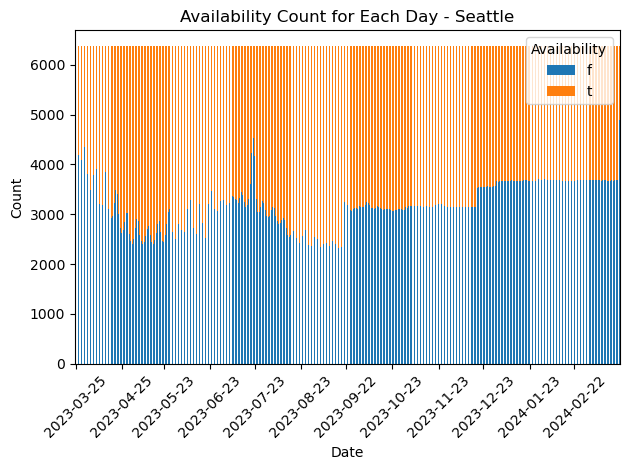

In [13]:

import matplotlib.dates as mdates

#calendar_seattle['date'] = pd.to_datetime(calendar_seattle['date'])
calendar_seattle['date'] = pd.to_datetime(calendar_seattle['date']).dt.strftime('%Y-%m-%d')


# Group the data by 'date' and 'available', and count occurrences
availability_counts = calendar_seattle.groupby(['date', 'available']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(20, 6))
availability_counts.plot(kind='bar', stacked=True)

# Set the x-axis tick locator to show labels for each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Availability Count for Each Day - Seattle')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Availability')
plt.tight_layout()

# Show plot
plt.show()


### Los Angeles, CA

In [14]:
simple_eda(calendar_la)

Basic Structure:
Number of Rows: 15492121
Number of Columns: 7

Missing Values by Column:
listing_id           0
date                 0
available            0
price              365
adjusted_price     365
minimum_nights    1074
maximum_nights    1074
dtype: int64 

Data Types:
listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object 

Unique Values by Column:
listing_id: 42446
date: 367
available: 2
price: 8822
adjusted_price: 8829
minimum_nights: 110
maximum_nights: 338


Summary Statistics for Numerical Columns:
                  listing_id  minimum_nights  maximum_nights
count           15492121.000    15491047.000    15491047.000
mean  272461078167449536.000          24.468      253600.745
std   351398555232128768.000          53.720    23301087.490
min                  109.000           1.000           1.000
25%             26782743.000        

In [15]:
calculate_price_stats(calendar_la)

{'maximum_price': 99999.0,
 'minimum_price': 0.0,
 'average_price': 303.0779516537699,
 'median_price': 150.0,
 'maximum_adjusted_price': 99999.0,
 'minimum_adjusted_price': 0.0,
 'average_adjusted_price': 302.5824400410128,
 'median_adjusted_price': 150.0}

In [16]:
calculate_price_difference_stats(calendar_la)

Absolute Price Difference Range (Excluding Zero Differences):
{'max': 1950.0, 'min': 1.0, 'median': 14.0, 'average': 29.982247034894915}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
358784


<Figure size 2000x600 with 0 Axes>

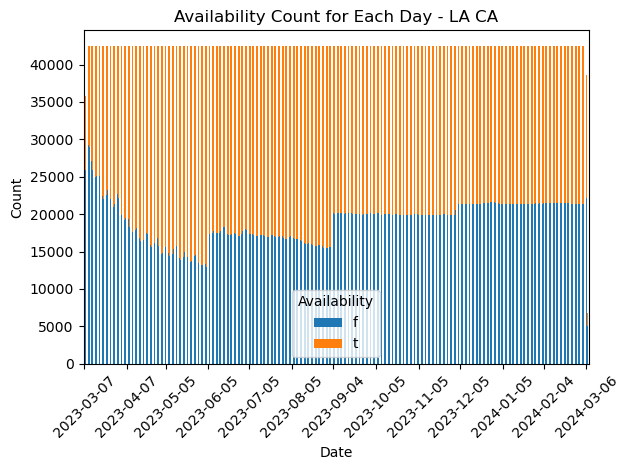

In [17]:
import matplotlib.dates as mdates

calendar_la['date'] = pd.to_datetime(calendar_la['date']).dt.strftime('%Y-%m-%d')

# Group the data by 'date' and 'available', and count occurrences
availability_counts = calendar_la.groupby(['date', 'available']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(20, 6))
availability_counts.plot(kind='bar', stacked=True)

# Set the x-axis tick locator to show labels for each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Availability Count for Each Day - LA CA')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Availability')
plt.tight_layout()

# Show plot
plt.show()


### San Franciso, CA

In [18]:
simple_eda(calendar_sf)

Basic Structure:
Number of Rows: 2530910
Number of Columns: 7

Missing Values by Column:
listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64 

Data Types:
listing_id         int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights     int64
maximum_nights     int64
dtype: object 

Unique Values by Column:
listing_id: 6934
date: 365
available: 2
price: 2462
adjusted_price: 2466
minimum_nights: 106
maximum_nights: 160


Summary Statistics for Numerical Columns:
                  listing_id  minimum_nights  maximum_nights
count            2530910.000     2530910.000     2530910.000
mean  160087175510391776.000          29.119     8394188.668
std   298195109393244608.000          69.345   133993310.029
min                  958.000           1.000           1.000
25%             17753503.000           2.000          90.000
50%  

In [19]:
calculate_price_stats(calendar_sf)

{'maximum_price': 99999.0,
 'minimum_price': 10.0,
 'average_price': 381.66195163004613,
 'median_price': 166.0,
 'maximum_adjusted_price': 99999.0,
 'minimum_adjusted_price': 10.0,
 'average_adjusted_price': 381.33414898198674,
 'median_adjusted_price': 165.0}

In [20]:
calculate_price_difference_stats(calendar_sf)

Absolute Price Difference Range (Excluding Zero Differences):
{'max': 875.0, 'min': 1.0, 'median': 11.0, 'average': 20.778492026122382}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
48847


<Figure size 1000x600 with 0 Axes>

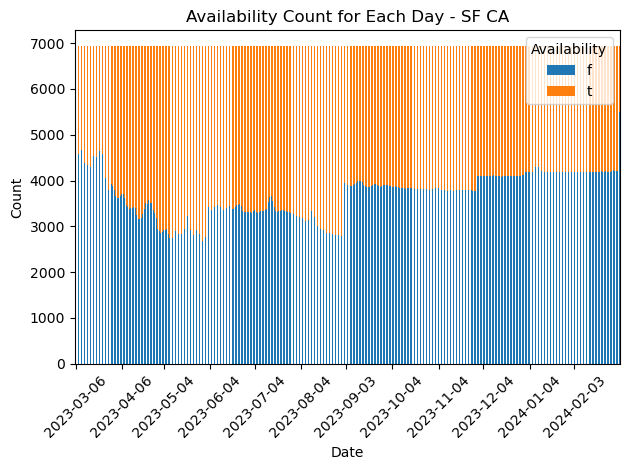

In [21]:

calendar_sf['date'] = pd.to_datetime(calendar_sf['date']).dt.strftime('%Y-%m-%d')

# Group the data by 'date' and 'available', and count occurrences
availability_counts = calendar_sf.groupby(['date', 'available']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
availability_counts.plot(kind='bar', stacked=True)

# Set the x-axis tick locator to show labels for each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Availability Count for Each Day - SF CA')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Availability')
plt.tight_layout()

# Show plot
plt.show()


### Portland, OR

In [22]:
simple_eda(calendar_portland)

Basic Structure:
Number of Rows: 1672065
Number of Columns: 7

Missing Values by Column:
listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64 

Data Types:
listing_id         int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights     int64
maximum_nights     int64
dtype: object 

Unique Values by Column:
listing_id: 4581
date: 365
available: 2
price: 1784
adjusted_price: 1786
minimum_nights: 44
maximum_nights: 98


Summary Statistics for Numerical Columns:
                  listing_id  minimum_nights  maximum_nights
count            1672065.000     1672065.000     1672065.000
mean  205644924249319680.000           9.065     1407126.352
std   326947867289493568.000          14.895    54937395.487
min                12899.000           1.000           1.000
25%             20067366.000           2.000         365.000
50%    

In [23]:
calculate_price_stats(calendar_portland)

{'maximum_price': 100000.0,
 'minimum_price': 10.0,
 'average_price': 159.2454479939476,
 'median_price': 117.0,
 'maximum_adjusted_price': 100000.0,
 'minimum_adjusted_price': 10.0,
 'average_adjusted_price': 158.94670781339244,
 'median_adjusted_price': 117.0}

In [24]:
calculate_price_difference_stats(calendar_portland)

Absolute Price Difference Range (Excluding Zero Differences):
{'max': 500.0, 'min': 1.0, 'median': 11.0, 'average': 17.79798052650559}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
41595


<Figure size 1000x600 with 0 Axes>

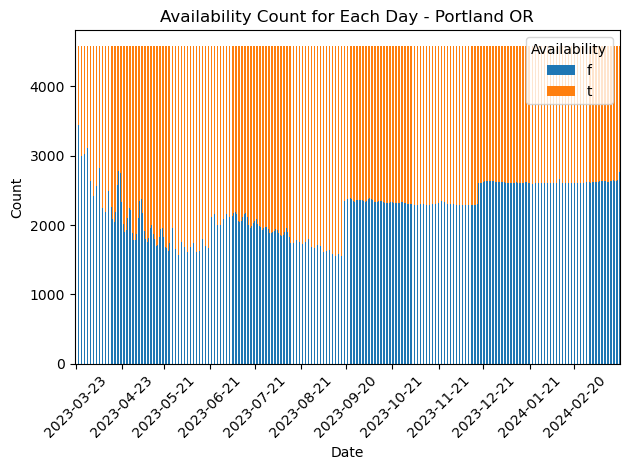

In [25]:

import matplotlib.dates as mdates

# Assuming you have the data in a DataFrame named calendar
calendar_portland['date'] = pd.to_datetime(calendar_portland['date']).dt.strftime('%Y-%m-%d')

# Group the data by 'date' and 'available', and count occurrences
availability_counts = calendar_portland.groupby(['date', 'available']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
availability_counts.plot(kind='bar', stacked=True)

# Set the x-axis tick locator to show labels for each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Availability Count for Each Day - Portland OR')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Availability')
plt.tight_layout()

# Show plot
plt.show()


### Clark County, NV

In [26]:
simple_eda(calendar_clark)

Basic Structure:
Number of Rows: 5085545
Number of Columns: 7

Missing Values by Column:
listing_id         0
date               0
available          0
price              0
adjusted_price     0
minimum_nights    23
maximum_nights    23
dtype: int64 

Data Types:
listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object 

Unique Values by Column:
listing_id: 13933
date: 365
available: 2
price: 4585
adjusted_price: 4544
minimum_nights: 61
maximum_nights: 127


Summary Statistics for Numerical Columns:
                  listing_id  minimum_nights  maximum_nights
count            5085545.000     5085522.000     5085522.000
mean  375015141003971136.000           8.177     2002302.146
std   366468338093486080.000          16.132    65531283.725
min                44701.000           1.000           1.000
25%             42764511.000           1.000        

In [27]:
calculate_price_stats(calendar_clark)

{'maximum_price': 100000.0,
 'minimum_price': 10.0,
 'average_price': 544.972127471097,
 'median_price': 199.0,
 'maximum_adjusted_price': 100000.0,
 'minimum_adjusted_price': 10.0,
 'average_adjusted_price': 542.7583242307363,
 'median_adjusted_price': 199.0}

In [28]:
calculate_price_difference_stats(calendar_clark)

Absolute Price Difference Range (Excluding Zero Differences):
{'max': 4000.0, 'min': 1.0, 'median': 16.0, 'average': 39.93808098602281}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
328106


<Figure size 1000x600 with 0 Axes>

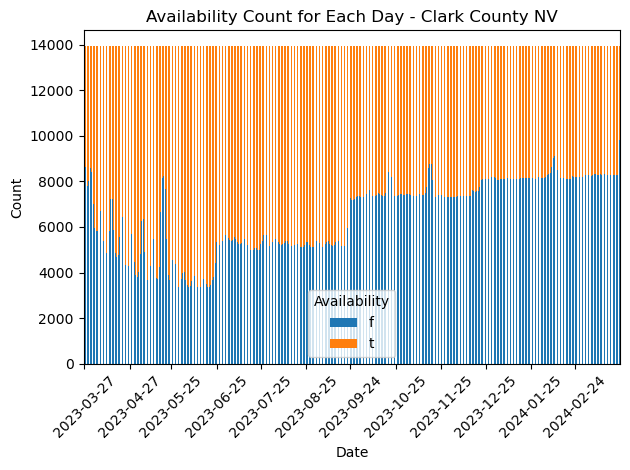

In [29]:

import matplotlib.dates as mdates

# Assuming you have the data in a DataFrame named calendar
calendar_clark['date'] = pd.to_datetime(calendar_clark['date']).dt.strftime('%Y-%m-%d')

# Group the data by 'date' and 'available', and count occurrences
availability_counts = calendar_clark.groupby(['date', 'available']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
availability_counts.plot(kind='bar', stacked=True)

# Set the x-axis tick locator to show labels for each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Availability Count for Each Day - Clark County NV')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Availability')
plt.tight_layout()

# Show plot
plt.show()


### Combined Plot for Every City

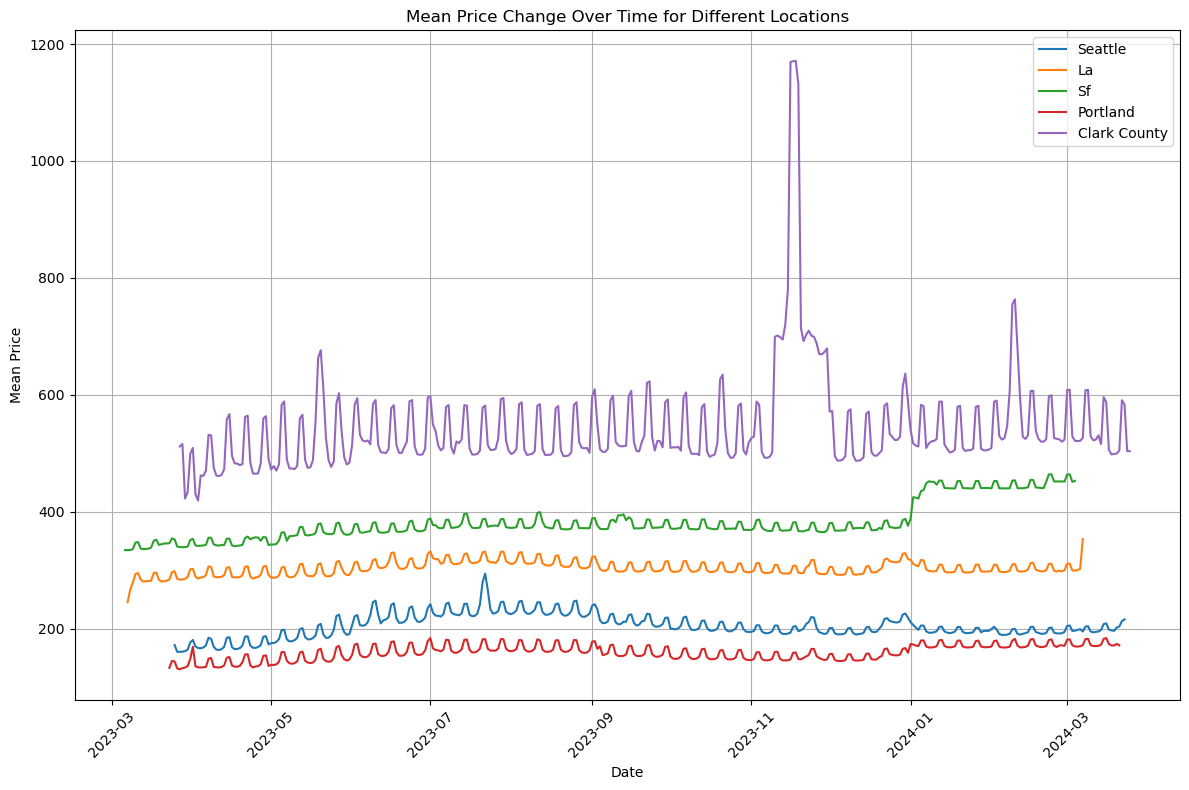

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary containing the DataFrames for each location
location_data = {
    'Seattle': calendar_seattle,
    'LA': calendar_la,
    'SF': calendar_sf,
    'Portland': calendar_portland,
    'Clark County': calendar_clark
}

# Dictionary to store mean price by date for each location
mean_price_by_location = {}

# Process data for each location
for location, data in location_data.items():
    # Convert 'date' column to datetime
    data['date'] = pd.to_datetime(data['date'])

    # Convert 'price' column to numeric after removing the dollar sign and converting to float
    data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

    # Group data by 'date' and calculate mean price for each day
    mean_price_by_date = data.groupby('date')['price'].mean()

    # Store mean price by date for this location
    mean_price_by_location[location] = mean_price_by_date

# Plotting
plt.figure(figsize=(12, 8))

for location, mean_price_by_date in mean_price_by_location.items():
    plt.plot(mean_price_by_date.index, mean_price_by_date.values, linestyle='-', label=location.title())

plt.title('Mean Price Change Over Time for Different Locations')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


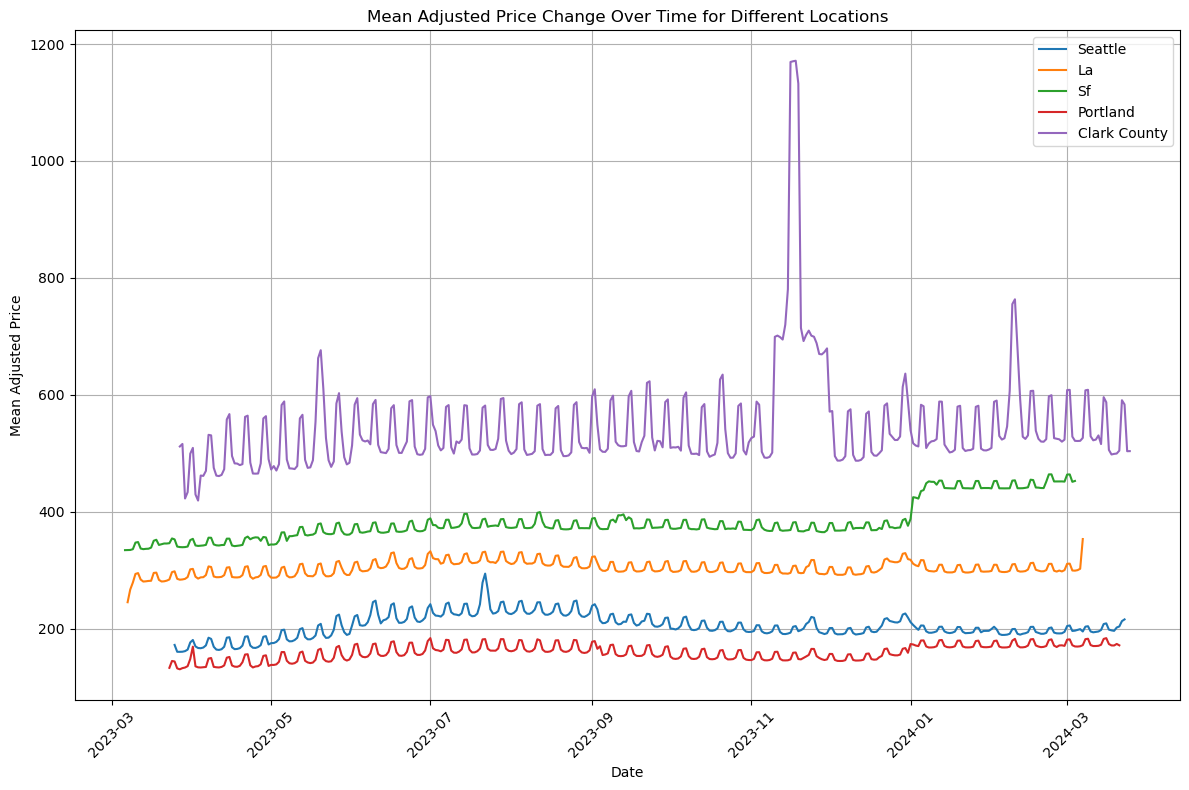

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary containing the DataFrames for each location
location_data = {
    'Seattle': calendar_seattle,
    'LA': calendar_la,
    'SF': calendar_sf,
    'Portland': calendar_portland,
    'Clark County': calendar_clark
}

# Dictionary to store mean price by date for each location
mean_price_by_location = {}

# Process data for each location
for location, data in location_data.items():
    # Convert 'date' column to datetime
    data['date'] = pd.to_datetime(data['date'])

    # Convert 'price' column to numeric after removing the dollar sign and converting to float
    data['adjusted_price'] = data['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

    # Group data by 'date' and calculate mean price for each day
    mean_price_by_date = data.groupby('date')['price'].mean()

    # Store mean price by date for this location
    mean_price_by_location[location] = mean_price_by_date

# Plotting
plt.figure(figsize=(12, 8))

for location, mean_price_by_date in mean_price_by_location.items():
    plt.plot(mean_price_by_date.index, mean_price_by_date.values, linestyle='-', label=location.title())

plt.title('Mean Adjusted Price Change Over Time for Different Locations')
plt.xlabel('Date')
plt.ylabel('Mean Adjusted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

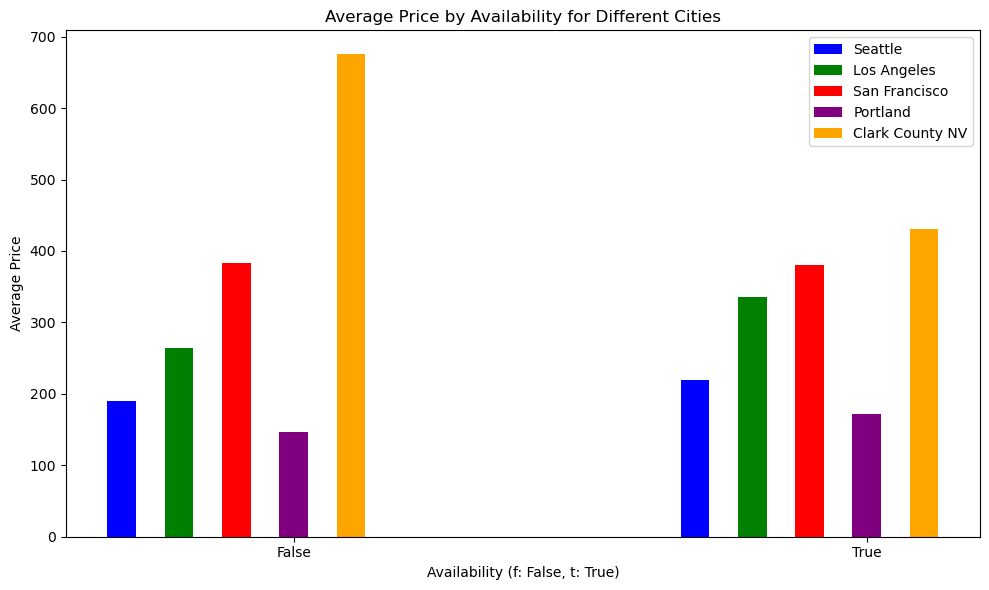

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'price' column to numeric after removing the dollar sign and converting to float
calendar_seattle['price'] = calendar_seattle['price'].replace('[\$,]', '', regex=True).astype(float)
calendar_la['price'] = calendar_la['price'].replace('[\$,]', '', regex=True).astype(float)
calendar_sf['price'] = calendar_sf['price'].replace('[\$,]', '', regex=True).astype(float)
calendar_portland['price'] = calendar_portland['price'].replace('[\$,]', '', regex=True).astype(float)
calendar_clark['price'] = calendar_clark['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'available' and calculate the mean price for each group
price_by_available_seattle = calendar_seattle.groupby('available')['price'].mean()
price_by_available_la = calendar_la.groupby('available')['price'].mean()
price_by_available_sf = calendar_sf.groupby('available')['price'].mean()
price_by_available_portland = calendar_portland.groupby('available')['price'].mean()
price_by_available_clark = calendar_clark.groupby('available')['price'].mean()

# Plotting for Seattle
plt.figure(figsize=(10, 6))
plt.bar([0, 2], price_by_available_seattle.values, width=0.1, color='blue', label='Seattle')
# Plot for LA
plt.bar([0.2, 2.2], price_by_available_la.values, width=0.1, color='green', label='Los Angeles')
# Plot for SF
plt.bar([0.4, 2.4], price_by_available_sf.values, width=0.1, color='red', label='San Francisco')
# Plot for Portland
plt.bar([0.6, 2.6], price_by_available_portland.values, width=0.1, color='purple', label='Portland')
# Plot for Clark County
plt.bar([0.8, 2.8], price_by_available_clark.values, width=0.1, color='orange', label='Clark County NV')

plt.title('Average Price by Availability for Different Cities')
plt.xlabel('Availability (f: False, t: True)')
plt.ylabel('Average Price')
plt.xticks([0.6, 2.6], ['False', 'True'])
plt.legend()
plt.tight_layout()
plt.show()


# Listings Detailed

### EDA Plots for AirBnB Dataset - Listings Detailed

1. Average Price by Number of People Allowed

2. Number of Reviews for Each Neighborhood

3. Correlation Heatmap of Review Scores and Price

4. Distribution of Hosts by Start Year Ranges

5. Room Type Distribution

In [33]:
listings_seattle = pd.read_csv('usa/Seattle/listings_detailed.csv')
listings_la = pd.read_csv('usa/Los Angeles/listings_detailed.csv')
listings_sf = pd.read_csv('usa/San Francisco/listings_detailed.csv')
listings_portland = pd.read_csv('usa/Portland/listings_detailed.csv')
listings_clark = pd.read_csv('usa/Clark County NV/listings_detailed.csv')

### Seattle, WA

In [34]:
listings_seattle.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6606,https://www.airbnb.com/rooms/6606,20230324234225,2023-03-25,city scrape,"Fab, private seattle urban cottage!","This tiny cottage is only 15x10, but it has ev...","A peaceful yet highly accessible neighborhood,...",https://a0.muscache.com/pictures/45742/21116d7...,14942,...,4.760,4.880,4.570,str-opli-19-002622,f,3,3,0,0,0.950
1,9419,https://www.airbnb.com/rooms/9419,20230324234225,2023-03-25,city scrape,Glorious sun room w/ memory foambed,"Keeping you safe is our priority, we are adher...","Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,...,4.880,4.650,4.650,STR-OPLI-19-003039,f,9,0,9,0,1.140
2,9531,https://www.airbnb.com/rooms/9531,20230324234225,2023-03-25,city scrape,The Adorable Sweet Orange Craftsman,The Sweet Orange is a delightful and spacious ...,The neighborhood is awesome! Just far enough ...,https://a0.muscache.com/pictures/30470355/052c...,31481,...,4.960,4.970,4.900,STR-OPLI-19-002182,f,2,2,0,0,0.520
3,9534,https://www.airbnb.com/rooms/9534,20230324234225,2023-03-25,city scrape,The Coolest Tangerine Dream MIL!,Welcome to my delicious Tangerine Dream! A co...,The neighborhood is the best of two worlds...w...,https://a0.muscache.com/pictures/30476721/0751...,31481,...,4.990,4.960,4.940,STR-OPLI-19-002182,f,2,2,0,0,0.540
4,9596,https://www.airbnb.com/rooms/9596,20230324234225,2023-03-25,previous scrape,"the down home , spacious, central and fab!","We are in a great neighborhood, quiet, full of...","if you arrive early for check in at 3, I reco...",https://a0.muscache.com/pictures/665252/102d18...,14942,...,4.660,4.910,4.560,STR -OPLI-19-002622,f,3,3,0,0,0.680


In [35]:
simple_eda(listings_seattle)

Basic Structure:
Number of Rows: 6376
Number of Columns: 75

Missing Values by Column:
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                        9
neighborhood_overview                           1706
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                    900
host_about                                      1793
host_response_time                               720
host_response_rate                               720
host_accepta

#### Average Price by Number of People Allowed

Below plot visualizes the average price of accommodations in Seattle WA, based on the number of people they can accommodate. Each bar represents a different accommodation capacity, ranging from a minimum of one person to a maximum of sixteen people, with corresponding average prices displayed on the y-axis. As the accommodation capacity increases, there is a gradual rise in the average price, indicating a positive correlation between the number of people allowed and the price of the rental properties.

Our initial hypothesis posited that as the number of occupants a property could accommodate increased, so too would the price, reflecting larger property sizes, more amenities, and increased preparation time. Contrary to expectations, this pattern holds only up to a point. We observed a gradual price increase until the capacity reaches 10. Beyond this, the pricing trends became erratic: at a capacity of 11, prices dropped, rebounded at 12, surged at 14, then plummeted dramatically for capacities of 15 and 16.

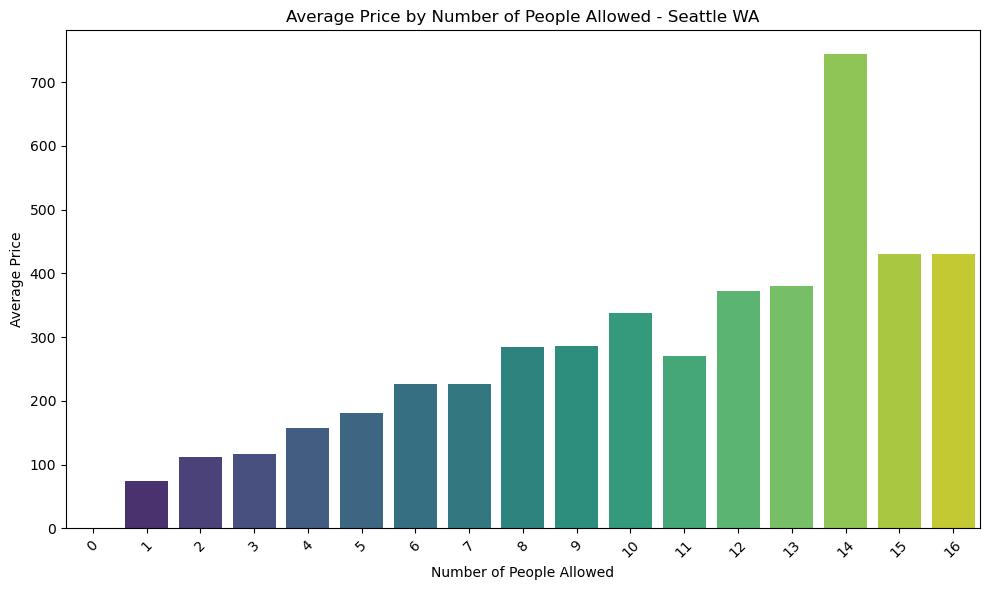

In [36]:
import seaborn as sns

# Replace '$' and ',' in 'price' column and convert to float
listings_seattle ['price'] = listings_seattle ['price'].replace('[\$,]', '', regex=True).astype(float)

# Group data by 'bathrooms_text' and calculate average price
avg_price_by_ppl = listings_seattle .groupby('accommodates')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='accommodates', y='price', data=avg_price_by_ppl, palette='viridis')
plt.title('Average Price by Number of People Allowed - Seattle WA')
plt.xlabel('Number of People Allowed')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Number of Reviews for Each Neighborhood Top 20



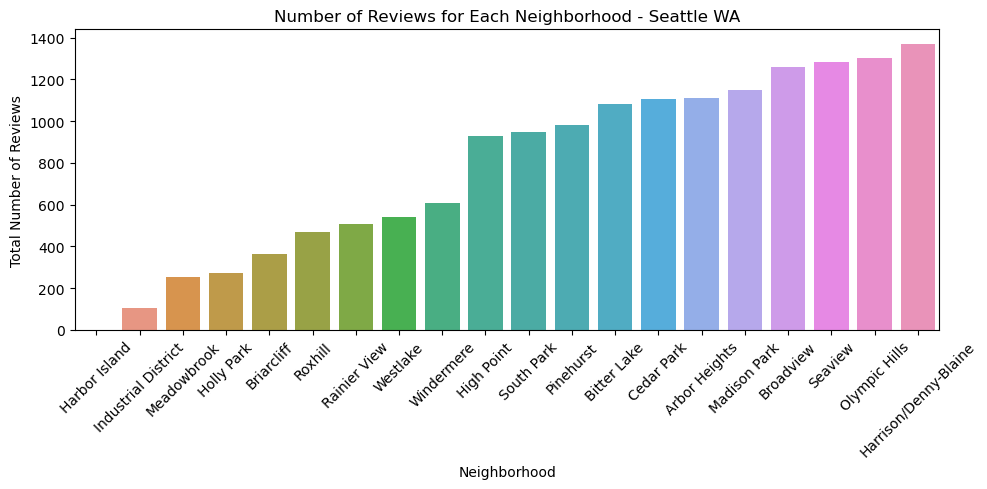

In [37]:
# Calculate the total number of reviews for each neighborhood
reviews_by_neighborhood = listings_seattle.groupby('neighbourhood_cleansed')['number_of_reviews'].sum().sort_values().head(20)

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=reviews_by_neighborhood.index, y=reviews_by_neighborhood.values)
plt.title('Number of Reviews for Each Neighborhood - Seattle WA')
plt.xlabel('Neighborhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Correlation Heatmap of Review Scores and Price

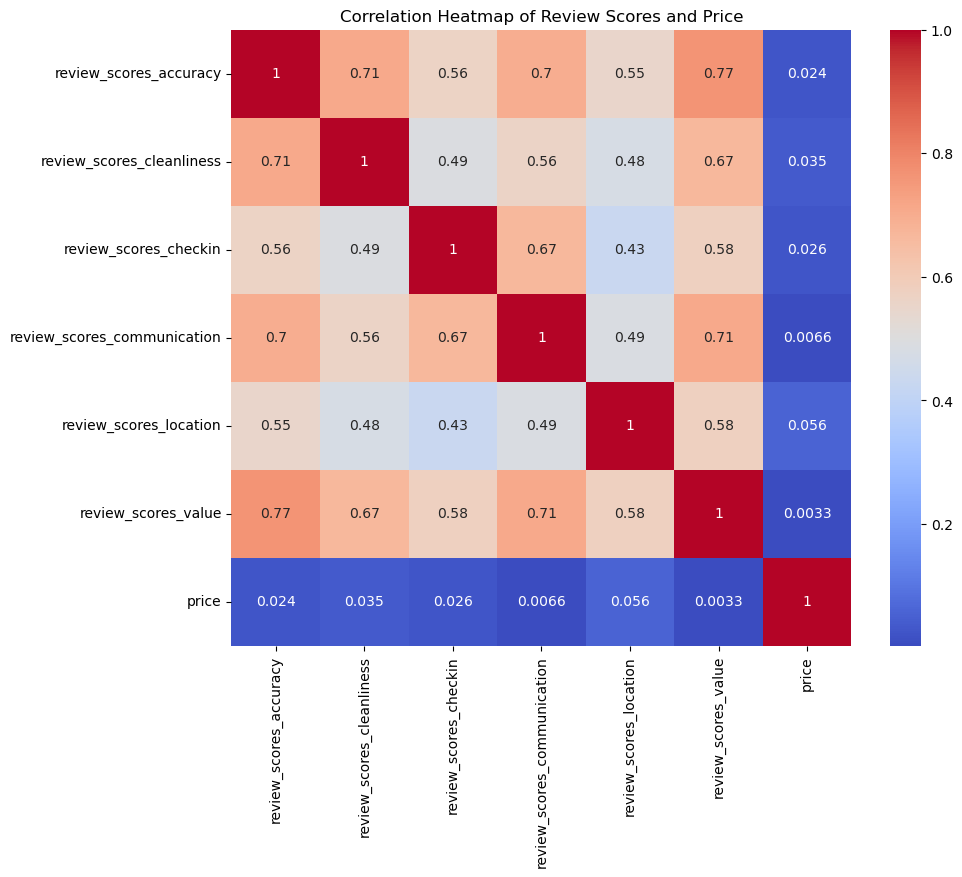

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
review_scores_columns = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                         'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price']

# Select the columns for the heatmap
heatmap_data = listings_seattle[review_scores_columns]

# Calculating the correlation matrix
corr = heatmap_data.corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Review Scores and Price')
plt.show()


### Los Angeles, CA

In [39]:
simple_eda(listings_la)

Basic Structure:
Number of Rows: 42451
Number of Columns: 75

Missing Values by Column:
id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                2
description                                       750
neighborhood_overview                           17494
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           2
host_since                                          2
host_location                                    8462
host_about                                      17824
host_response_time                               9375
host_response_rate                              

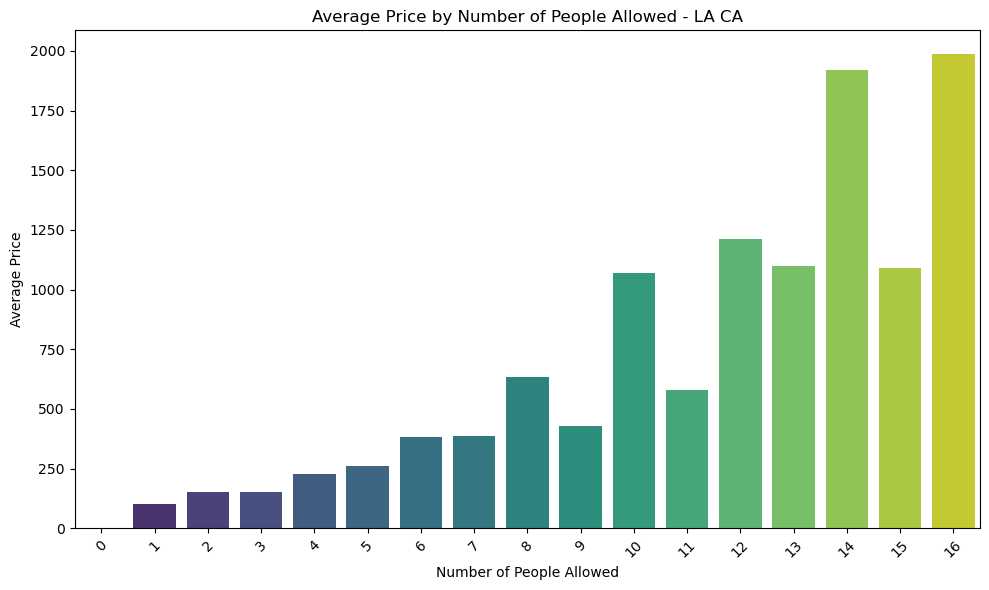

In [40]:
import seaborn as sns

# Replace '$' and ',' in 'price' column and convert to float
listings_la['price'] = listings_la['price'].replace('[\$,]', '', regex=True).astype(float)

# Group data by 'bathrooms_text' and calculate average price
avg_price_by_ppl = listings_la.groupby('accommodates')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='accommodates', y='price', data=avg_price_by_ppl, palette='viridis')
plt.title('Average Price by Number of People Allowed - LA CA')
plt.xlabel('Number of People Allowed')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


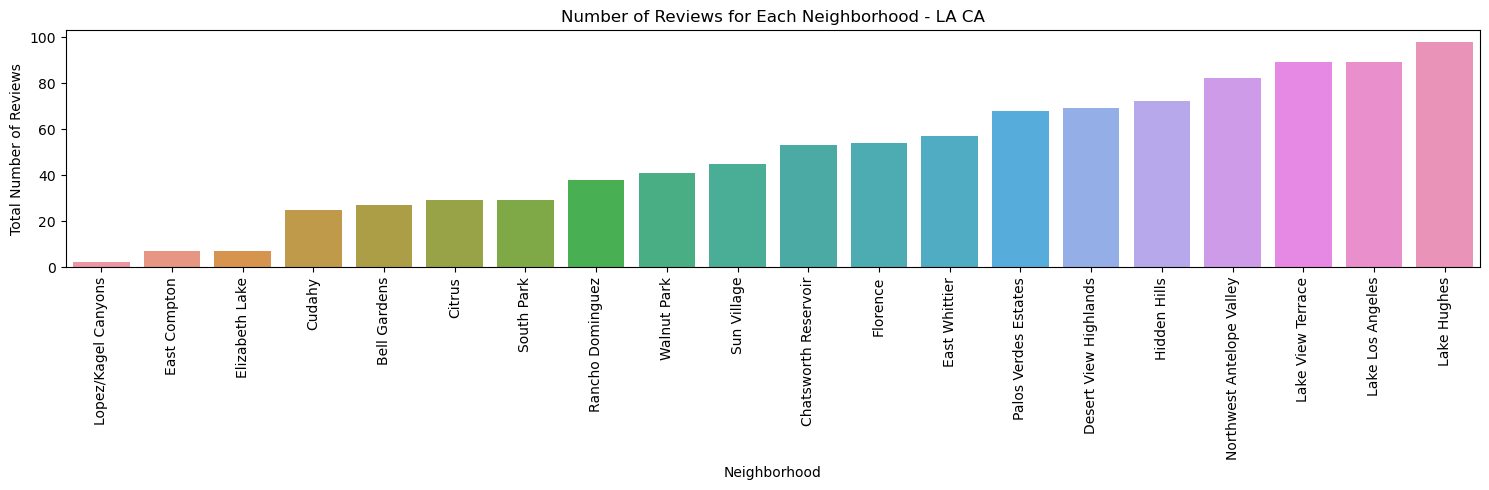

In [41]:
# Calculate the total number of reviews for each neighborhood
reviews_by_neighborhood = listings_la.groupby('neighbourhood_cleansed')['number_of_reviews'].sum().sort_values().head(20)

# Plotting
plt.figure(figsize=(15, 5))
sns.barplot(x=reviews_by_neighborhood.index, y=reviews_by_neighborhood.values)
plt.title('Number of Reviews for Each Neighborhood - LA CA')
plt.xlabel('Neighborhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


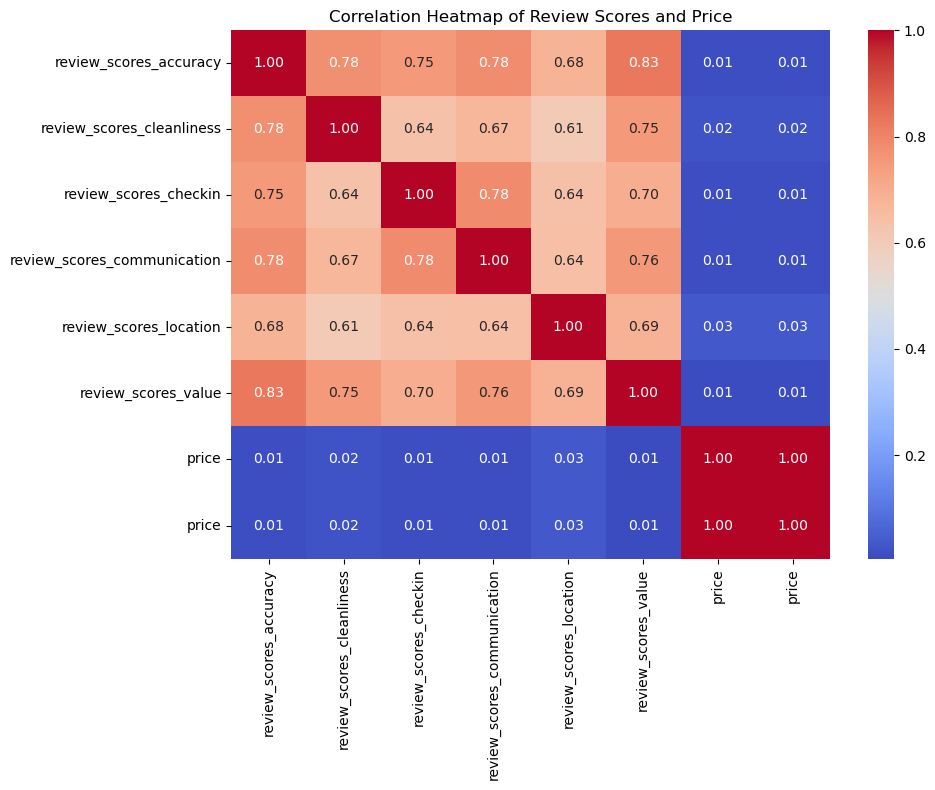

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
review_scores_columns = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                         'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price']

# Select the columns for the heatmap
heatmap_data = listings_la[review_scores_columns + ['price']]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Review Scores and Price')
plt.tight_layout()
plt.show()


### San Francisco, CA

In [43]:
simple_eda(listings_sf)

Basic Structure:
Number of Rows: 6936
Number of Columns: 75

Missing Values by Column:
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                       47
neighborhood_overview                           2086
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                   1221
host_about                                      2252
host_response_time                              1019
host_response_rate                              1019
host_accepta

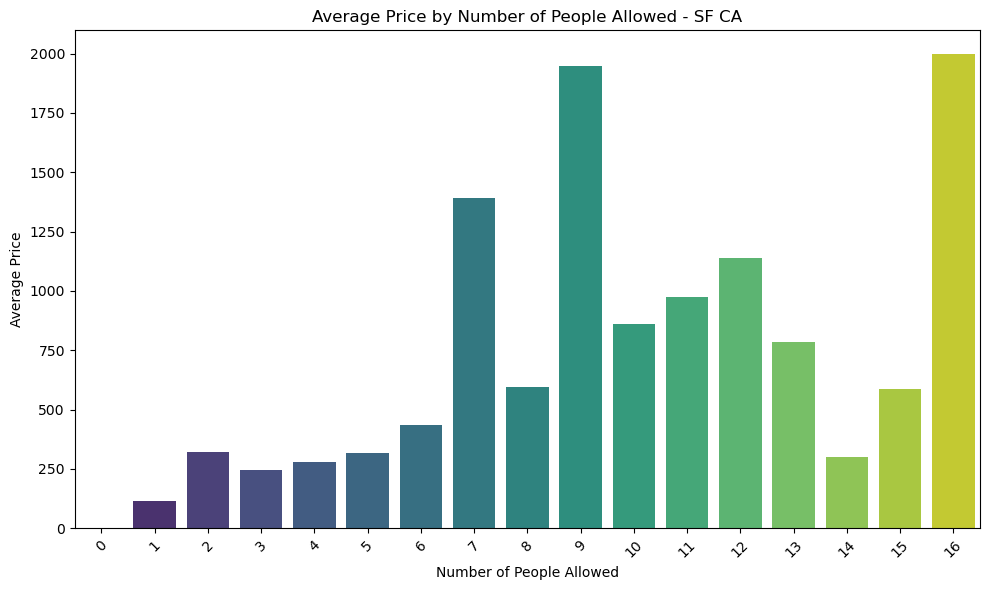

In [44]:
import seaborn as sns

# Replace '$' and ',' in 'price' column and convert to float
listings_sf['price'] = listings_sf['price'].replace('[\$,]', '', regex=True).astype(float)

# Group data by 'bathrooms_text' and calculate average price
avg_price_by_ppl = listings_sf.groupby('accommodates')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='accommodates', y='price', data=avg_price_by_ppl, palette='viridis')
plt.title('Average Price by Number of People Allowed - SF CA')
plt.xlabel('Number of People Allowed')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


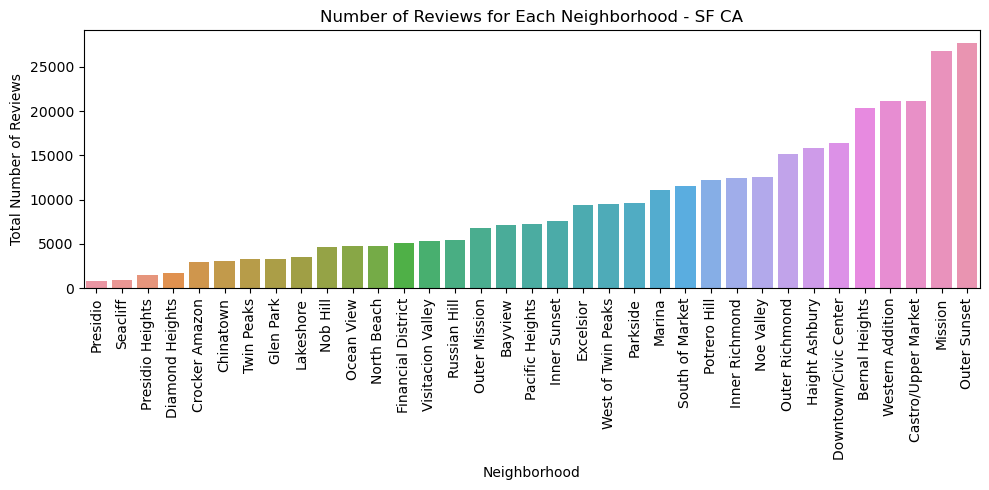

In [45]:
# Calculate the total number of reviews for each neighborhood
reviews_by_neighborhood = listings_sf.groupby('neighbourhood_cleansed')['number_of_reviews'].sum().sort_values()

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=reviews_by_neighborhood.index, y=reviews_by_neighborhood.values)
plt.title('Number of Reviews for Each Neighborhood - SF CA')
plt.xlabel('Neighborhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


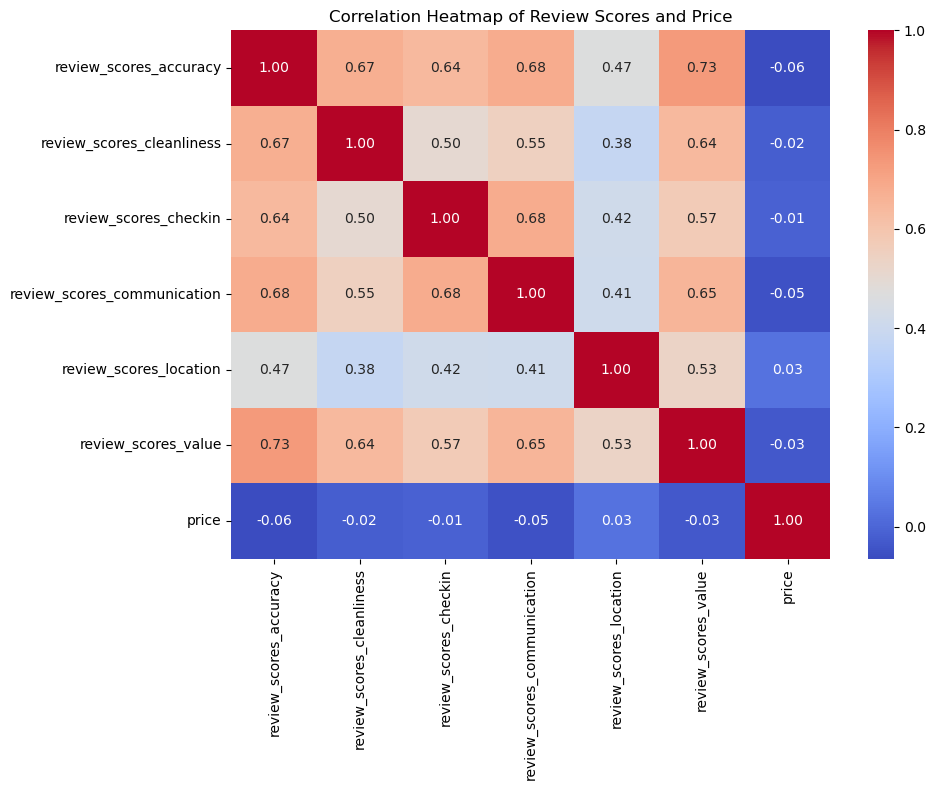

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
review_scores_columns = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                         'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price']

# Select the columns for the heatmap
heatmap_data = listings_sf[review_scores_columns]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Review Scores and Price')
plt.tight_layout()
plt.show()


### Portland, OR

In [47]:
simple_eda(listings_portland)

Basic Structure:
Number of Rows: 4587
Number of Columns: 75

Missing Values by Column:
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                       11
neighborhood_overview                           1114
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                    646
host_about                                      1353
host_response_time                               684
host_response_rate                               684
host_accepta

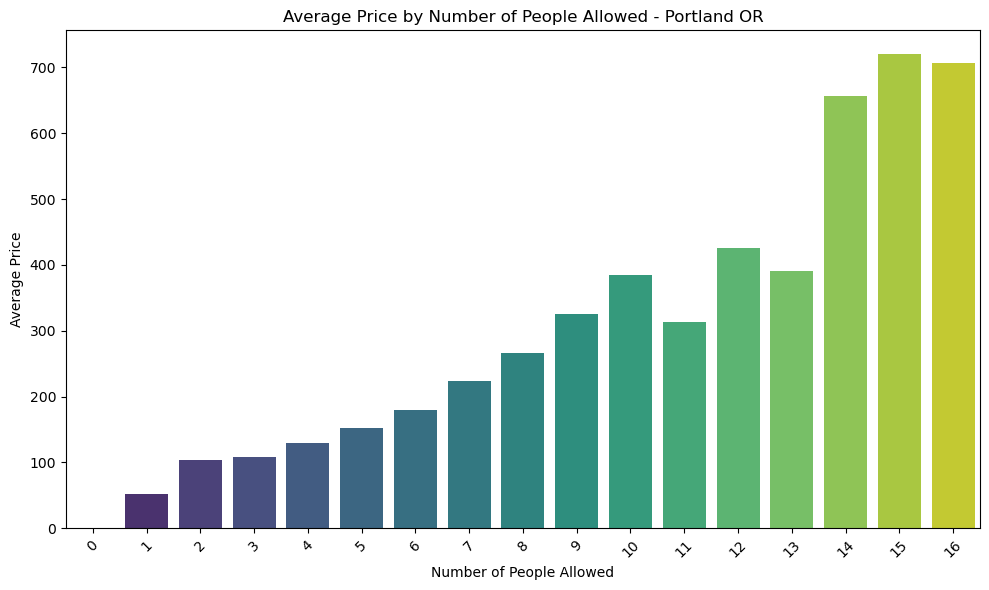

In [48]:
import seaborn as sns

# Replace '$' and ',' in 'price' column and convert to float
listings_portland['price'] = listings_portland['price'].replace('[\$,]', '', regex=True).astype(float)

# Group data by 'bathrooms_text' and calculate average price
avg_price_by_ppl = listings_portland.groupby('accommodates')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='accommodates', y='price', data=avg_price_by_ppl, palette='viridis')
plt.title('Average Price by Number of People Allowed - Portland OR')
plt.xlabel('Number of People Allowed')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


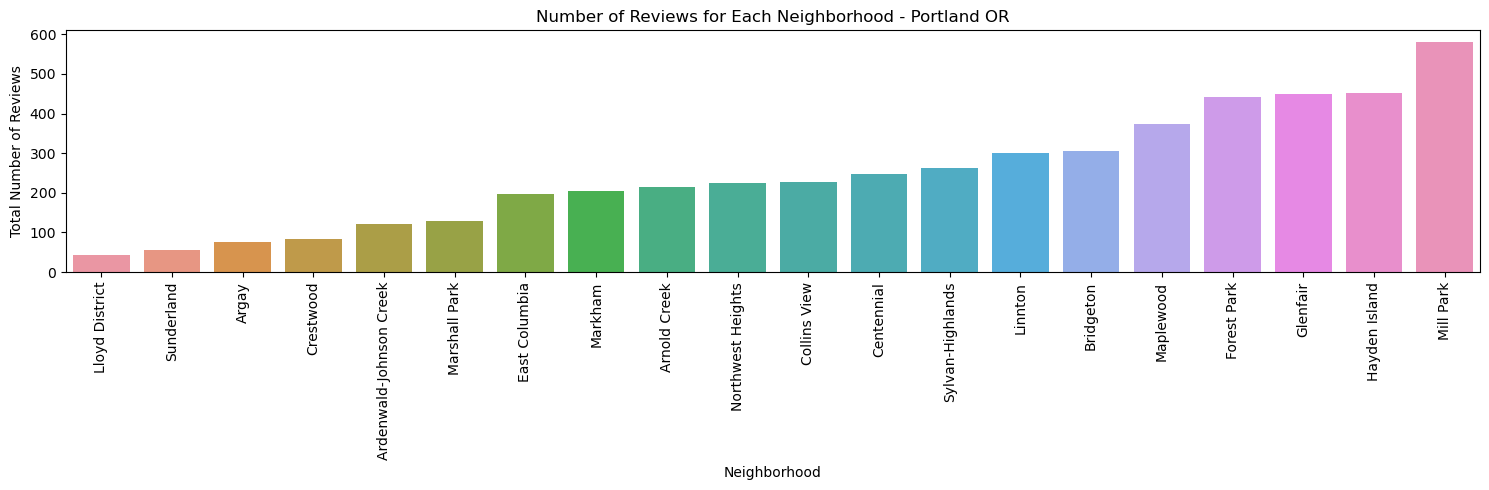

In [49]:
# Calculate the total number of reviews for each neighborhood
reviews_by_neighborhood = listings_portland.groupby('neighbourhood_cleansed')['number_of_reviews'].sum().sort_values().head(20)

# Plotting
plt.figure(figsize=(15, 5))
sns.barplot(x=reviews_by_neighborhood.index, y=reviews_by_neighborhood.values)
plt.title('Number of Reviews for Each Neighborhood - Portland OR')
plt.xlabel('Neighborhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


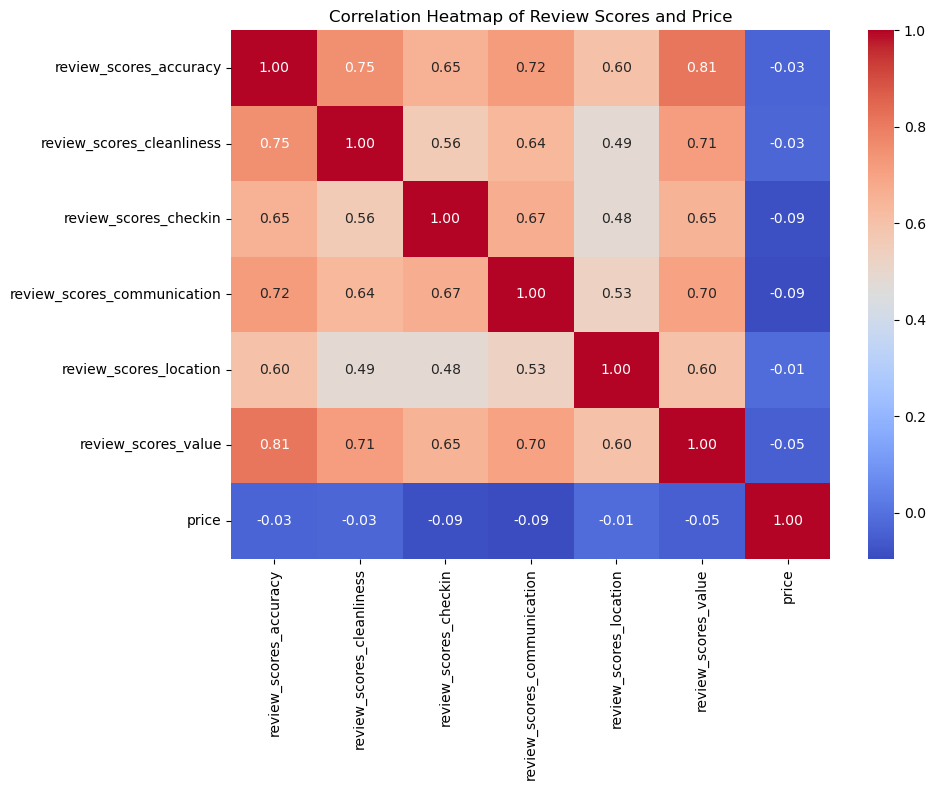

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
review_scores_columns = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                         'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price']

# Select the columns for the heatmap
heatmap_data = listings_portland[review_scores_columns]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Review Scores and Price')
plt.tight_layout()
plt.show()


### Clark County, NV

In [51]:
simple_eda(listings_clark)

Basic Structure:
Number of Rows: 13933
Number of Columns: 75

Missing Values by Column:
id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                0
description                                       170
neighborhood_overview                            6151
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           0
host_since                                          0
host_location                                    4028
host_about                                       6648
host_response_time                                683
host_response_rate                              

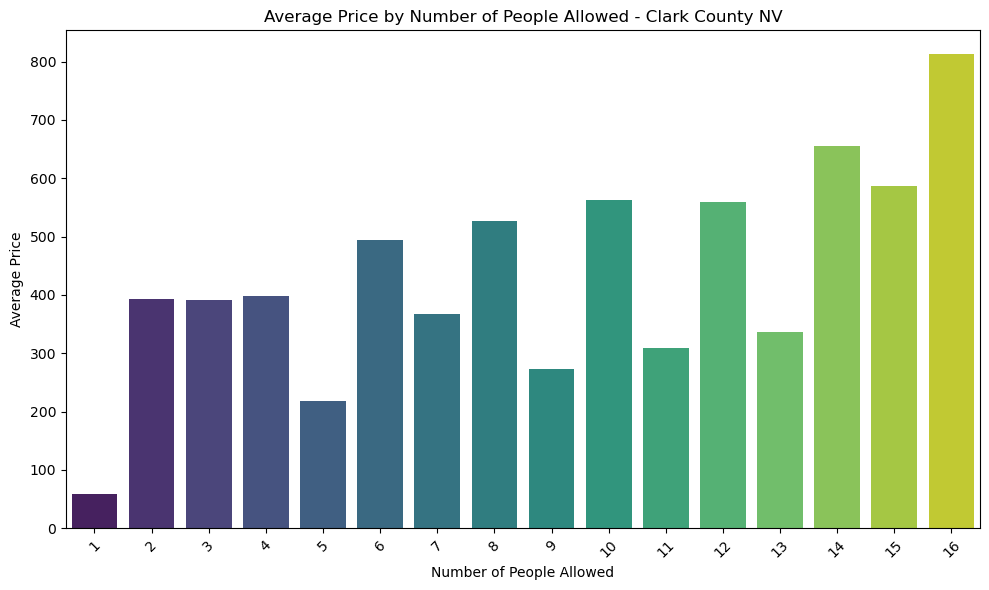

In [52]:
import seaborn as sns

# Replace '$' and ',' in 'price' column and convert to float
listings_clark['price'] = listings_clark['price'].replace('[\$,]', '', regex=True).astype(float)

# Group data by 'bathrooms_text' and calculate average price
avg_price_by_ppl = listings_clark.groupby('accommodates')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='accommodates', y='price', data=avg_price_by_ppl, palette='viridis')
plt.title('Average Price by Number of People Allowed - Clark County NV')
plt.xlabel('Number of People Allowed')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


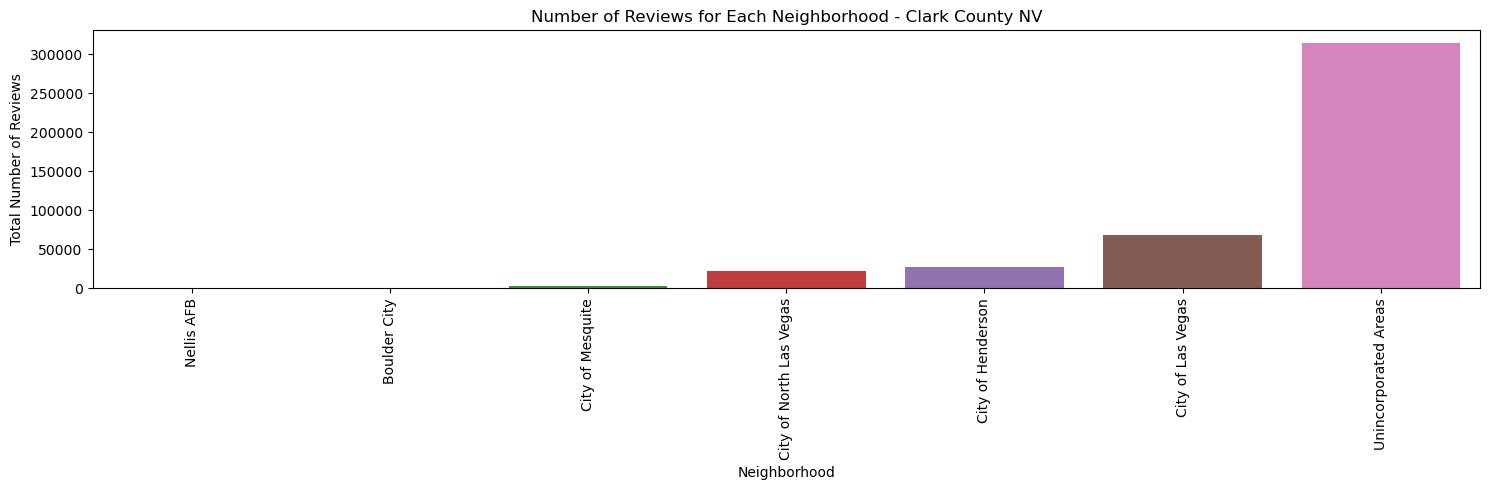

In [53]:
# Calculate the total number of reviews for each neighborhood
reviews_by_neighborhood = listings_clark.groupby('neighbourhood_cleansed')['number_of_reviews'].sum().sort_values()

# Plotting
plt.figure(figsize=(15, 5))
sns.barplot(x=reviews_by_neighborhood.index, y=reviews_by_neighborhood.values)
plt.title('Number of Reviews for Each Neighborhood - Clark County NV')
plt.xlabel('Neighborhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


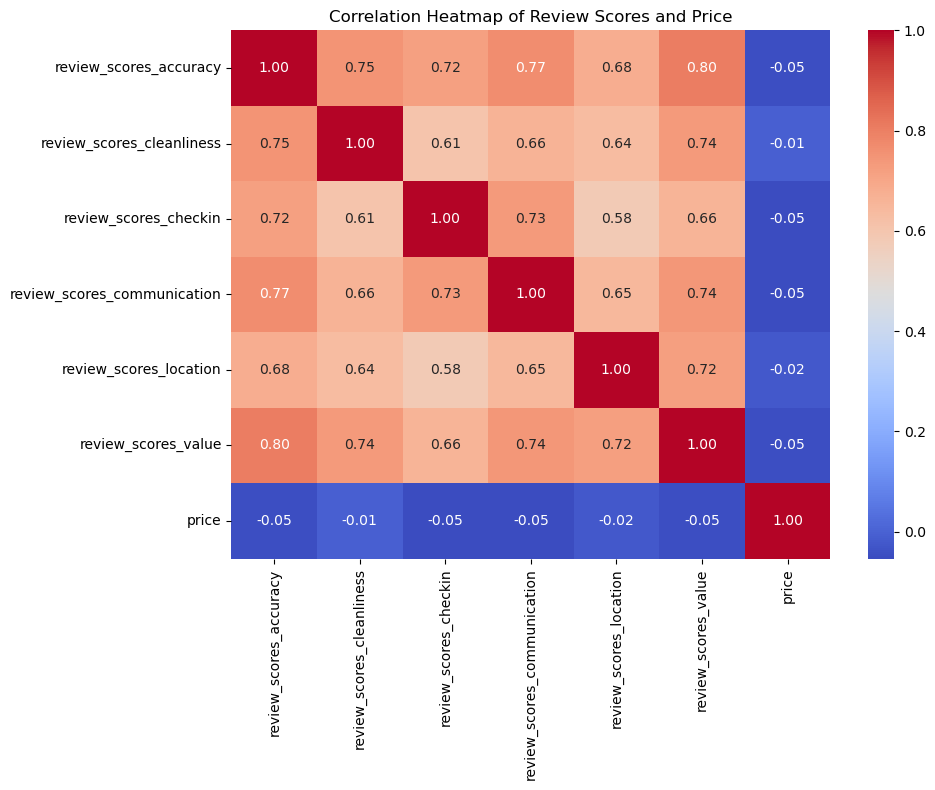

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
review_scores_columns = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                         'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price']

# Select the columns for the heatmap
heatmap_data = listings_clark[review_scores_columns]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Review Scores and Price')
plt.tight_layout()
plt.show()


### How many year since the host has been the host of AirBnB?

In [55]:
listings_clark['host_since'].head(5)

0    2013-01-07
1    2014-09-02
2    2013-01-12
3    2011-08-17
4    2014-09-08
Name: host_since, dtype: object

In [56]:
def plot_yearly_monthly_counts(dataframes):
    """
    Plots the monthly counts for each DataFrame with x-axis labels for the first month of each year.
    Parameters:
    - dataframes: A dictionary of DataFrames with city names as keys.
    """
    plt.figure(figsize=(15, 10))
    # Set up colors for each city
    colors = ['blue', 'green', 'red', 'purple', 'orange']
    width = 0.15  # Bar width
    # Get the unique 'Year-Month' for January across all datasets
    all_jan_months = []
    for df in dataframes.values():
        df['Year-Month'] = pd.to_datetime(df['host_since']).dt.to_period('M')
        jan_months = df[df['Year-Month'].dt.month == 1]['Year-Month'].unique()
        all_jan_months.extend(jan_months)
    all_jan_months = sorted(set(all_jan_months))
    # Create positions for the bars
    positions = np.arange(len(all_jan_months))
    # Plot data for each city
    for i, (city, df) in enumerate(dataframes.items()):
        # Group by 'Year-Month' and count instances, reindex to include all January months
        monthly_counts = df.groupby('Year-Month').size().reindex(all_jan_months, fill_value=0)
        plt.bar(positions + i * width, monthly_counts.values, width=width, color=colors[i], label=city)
    # Set x-axis ticks and labels to January of each year
    plt.xticks(positions + width, [str(month) for month in all_jan_months], rotation=45)
    plt.title('Host Sign-ups by Year (January of Each Year)')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Host Sign-ups')
    plt.legend()
    plt.tight_layout()
    plt.show()

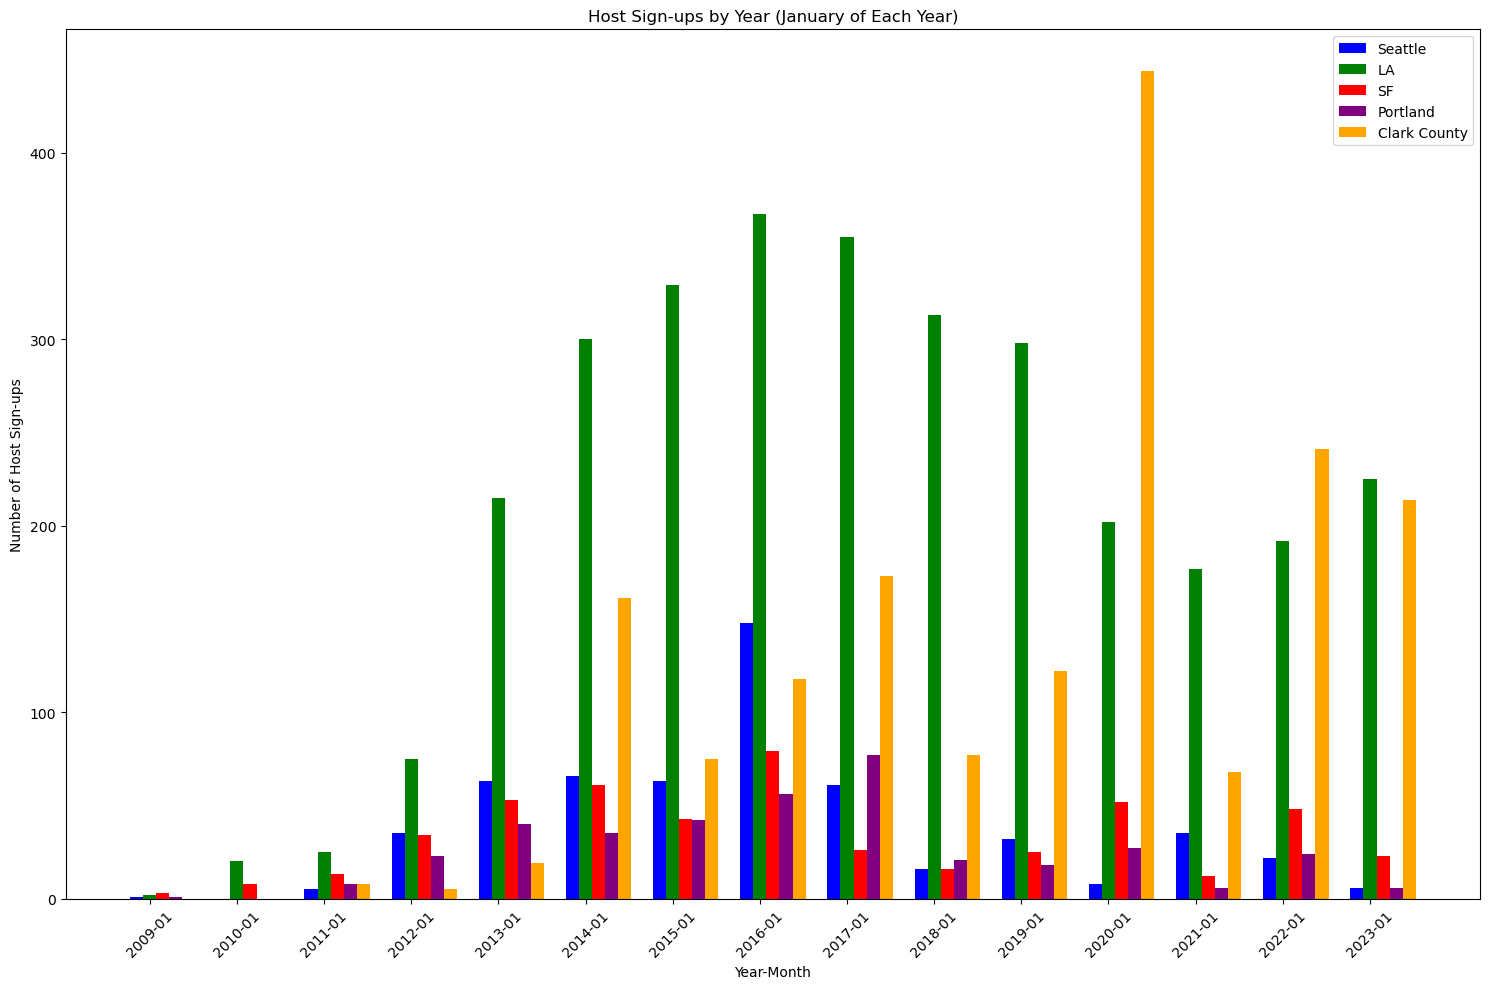

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary containing the DataFrames for each location
location_data = {
    'Seattle': listings_seattle,
    'LA': listings_la,
    'SF': listings_sf,
    'Portland': listings_portland,
    'Clark County': listings_clark
}

plot_yearly_monthly_counts(location_data)

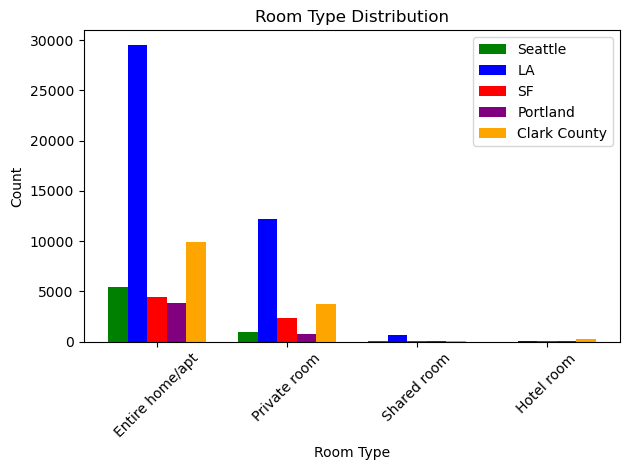

In [58]:
room_types = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']

room_type_seattle = listings_seattle['room_type'].value_counts()
room_type_la = listings_la['room_type'].value_counts()
room_type_sf = listings_sf['room_type'].value_counts()
room_type_portland = listings_portland['room_type'].value_counts()
room_type_clark = listings_clark['room_type'].value_counts()

bar_width = 0.15
index = np.arange(len(room_types))

plt.bar(index - 0.3, room_type_seattle.reindex(room_types, fill_value=0), width=bar_width, color='green', label='Seattle')
plt.bar(index - 0.15, room_type_la.reindex(room_types, fill_value=0), width=bar_width, color='blue', label='LA')
plt.bar(index, room_type_sf.reindex(room_types, fill_value=0), width=bar_width, color='red', label='SF')
plt.bar(index + 0.15, room_type_portland.reindex(room_types, fill_value=0), width=bar_width, color='purple', label='Portland')
plt.bar(index + 0.3, room_type_clark.reindex(room_types, fill_value=0), width=bar_width, color='orange', label='Clark County')

plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(index, room_types, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

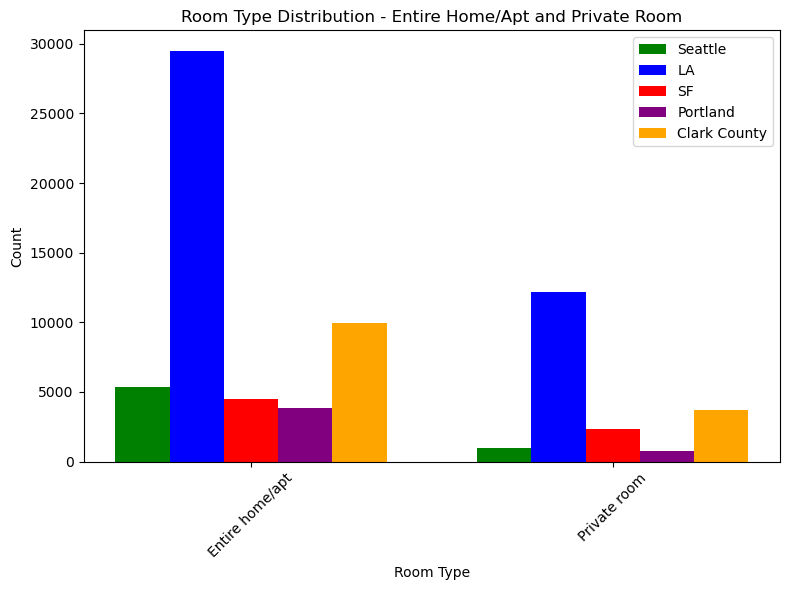

In [59]:
# Plotting Room Type Distribution
plt.figure(figsize=(8, 6))

room_types = ['Entire home/apt', 'Private room']
# 'Shared room', 'Hotel room']

room_type_seattle = listings_seattle['room_type'].value_counts()
room_type_la = listings_la['room_type'].value_counts()
room_type_sf = listings_sf['room_type'].value_counts()
room_type_portland = listings_portland['room_type'].value_counts()
room_type_clark = listings_clark['room_type'].value_counts()


bar_width = 0.15
index = np.arange(len(room_types))

plt.bar(index - 0.3, room_type_seattle.reindex(room_types, fill_value=0), width=bar_width, color='green', label='Seattle')
plt.bar(index - 0.15, room_type_la.reindex(room_types, fill_value=0), width=bar_width, color='blue', label='LA')
plt.bar(index, room_type_sf.reindex(room_types, fill_value=0), width=bar_width, color='red', label='SF')
plt.bar(index + 0.15, room_type_portland.reindex(room_types, fill_value=0), width=bar_width, color='purple', label='Portland')
plt.bar(index + 0.3, room_type_clark.reindex(room_types, fill_value=0), width=bar_width, color='orange', label='Clark County')

plt.title('Room Type Distribution - Entire Home/Apt and Private Room')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(index, room_types, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


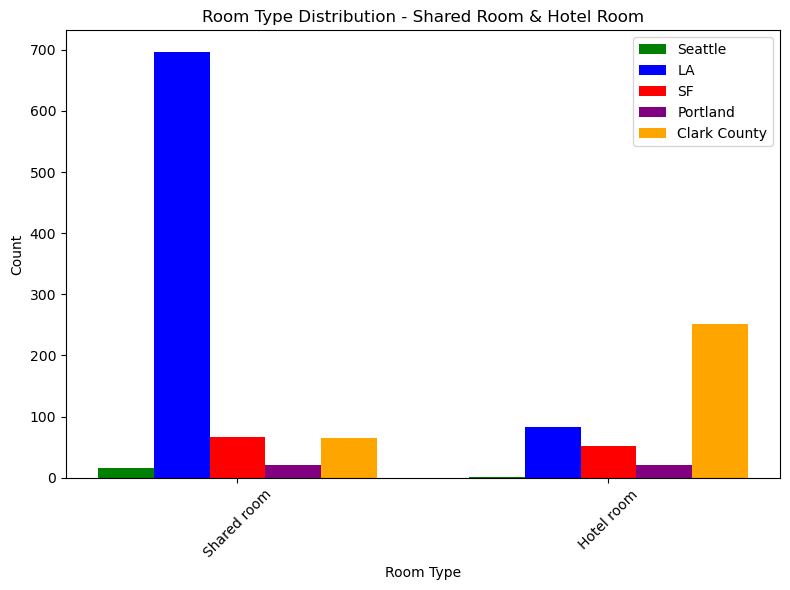

In [60]:
# Plotting Room Type Distribution
plt.figure(figsize=(8, 6))

room_types = ['Shared room', 'Hotel room']


room_type_seattle = listings_seattle['room_type'].value_counts()
room_type_la = listings_la['room_type'].value_counts()
room_type_sf = listings_sf['room_type'].value_counts()
room_type_portland = listings_portland['room_type'].value_counts()
room_type_clark = listings_clark['room_type'].value_counts()

bar_width = 0.15
index = np.arange(len(room_types))

plt.bar(index - 0.3, room_type_seattle.reindex(room_types, fill_value=0), width=bar_width, color='green', label='Seattle')
plt.bar(index - 0.15, room_type_la.reindex(room_types, fill_value=0), width=bar_width, color='blue', label='LA')
plt.bar(index, room_type_sf.reindex(room_types, fill_value=0), width=bar_width, color='red', label='SF')
plt.bar(index + 0.15, room_type_portland.reindex(room_types, fill_value=0), width=bar_width, color='purple', label='Portland')
plt.bar(index + 0.3, room_type_clark.reindex(room_types, fill_value=0), width=bar_width, color='orange', label='Clark County')

plt.title('Room Type Distribution - Shared Room & Hotel Room')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(index, room_types, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Neighbourhood


In [61]:
neigh_seattle = pd.read_csv('usa/Seattle/neighbourhoods.csv')
neigh_la = pd.read_csv('usa/Los Angeles/neighbourhoods.csv')
neigh_sf = pd.read_csv('usa/San Francisco/neighbourhoods.csv')
neigh_portland = pd.read_csv('usa/Portland/neighbourhoods.csv')
neigh_clark = pd.read_csv('usa/Clark County NV/neighbourhoods.csv')

### Seattle, WA

In [62]:
simple_eda(neigh_seattle)

Basic Structure:
Number of Rows: 90
Number of Columns: 2

Missing Values by Column:
neighbourhood_group    0
neighbourhood          0
dtype: int64 

Data Types:
neighbourhood_group    object
neighbourhood          object
dtype: object 

Unique Values by Column:
neighbourhood_group: 17
neighbourhood: 90


Summary Statistics for Numerical Columns:
        neighbourhood_group neighbourhood
count                    90            90
unique                   17            90
top     Other neighborhoods         Adams
freq                     21             1 

Categorical Columns Details:
Column 'neighbourhood_group' has 17 unique values:
Column 'neighbourhood' has 90 unique values:


### Los Angeles, CA

In [63]:
simple_eda(neigh_la)

Basic Structure:
Number of Rows: 270
Number of Columns: 2

Missing Values by Column:
neighbourhood_group    0
neighbourhood          0
dtype: int64 

Data Types:
neighbourhood_group    object
neighbourhood          object
dtype: object 

Unique Values by Column:
neighbourhood_group: 3
neighbourhood: 270


Summary Statistics for Numerical Columns:
        neighbourhood_group    neighbourhood
count                   270              270
unique                    3              270
top     City of Los Angeles  Adams-Normandie
freq                    114                1 

Categorical Columns Details:
Column 'neighbourhood_group' has 3 unique values:
Column 'neighbourhood' has 270 unique values:


### San Francisco, CA

In [64]:
simple_eda(neigh_sf)

Basic Structure:
Number of Rows: 37
Number of Columns: 2

Missing Values by Column:
neighbourhood_group    37
neighbourhood           0
dtype: int64 

Data Types:
neighbourhood_group    float64
neighbourhood           object
dtype: object 

Unique Values by Column:
neighbourhood_group: 0
neighbourhood: 37


Summary Statistics for Numerical Columns:
       neighbourhood_group
count                0.000
mean                   NaN
std                    NaN
min                    NaN
25%                    NaN
50%                    NaN
75%                    NaN
max                    NaN 

Categorical Columns Details:
Column 'neighbourhood' has 37 unique values:


### Portland, OR

In [65]:
simple_eda(neigh_portland)

Basic Structure:
Number of Rows: 95
Number of Columns: 2

Missing Values by Column:
neighbourhood_group    95
neighbourhood           0
dtype: int64 

Data Types:
neighbourhood_group    float64
neighbourhood           object
dtype: object 

Unique Values by Column:
neighbourhood_group: 0
neighbourhood: 95


Summary Statistics for Numerical Columns:
       neighbourhood_group
count                0.000
mean                   NaN
std                    NaN
min                    NaN
25%                    NaN
50%                    NaN
75%                    NaN
max                    NaN 

Categorical Columns Details:
Column 'neighbourhood' has 95 unique values:


### Clark County, NV

In [66]:
simple_eda(neigh_clark)

Basic Structure:
Number of Rows: 7
Number of Columns: 2

Missing Values by Column:
neighbourhood_group    7
neighbourhood          0
dtype: int64 

Data Types:
neighbourhood_group    float64
neighbourhood           object
dtype: object 

Unique Values by Column:
neighbourhood_group: 0
neighbourhood: 7


Summary Statistics for Numerical Columns:
       neighbourhood_group
count                0.000
mean                   NaN
std                    NaN
min                    NaN
25%                    NaN
50%                    NaN
75%                    NaN
max                    NaN 

Categorical Columns Details:
Column 'neighbourhood' has 7 unique values:


# Review Detailed

### EDA Plots for AirBnB Dataset - Calendar

1. Number of Reviewer IDs by Number of Reviews Written

2. Total Number of Reviews in Each City

3. Total Number of Reviews per Day

4. Total Number of Reviews per Month

In [67]:
review_seattle = pd.read_csv('usa/Seattle/reviews_detailed.csv')
review_la = pd.read_csv('usa/Los Angeles/reviews_detailed.csv')
review_sf = pd.read_csv('usa/San Francisco/reviews_detailed.csv')
review_portland = pd.read_csv('usa/Portland/reviews_detailed.csv')
review_clark = pd.read_csv('usa/Clark County NV/reviews_detailed.csv')

### Seattle, WA

In [68]:
simple_eda(review_seattle)

Basic Structure:
Number of Rows: 399453
Number of Columns: 6

Missing Values by Column:
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         61
dtype: int64 

Data Types:
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object 

Unique Values by Column:
listing_id: 5289
id: 399453
date: 4146
reviewer_id: 349670
reviewer_name: 43536
comments: 389554


Summary Statistics for Numerical Columns:
                  listing_id                     id   reviewer_id
count             399453.000             399453.000    399453.000
mean   38139111031202064.000 268553604413641696.000 124167153.037
std   152818306541186688.000 323976932841201728.000 124443724.628
min                 6606.000               5664.000        15.000
25%              8866927.000          300679037.000  26732436.000
50%             20012986.000          65970

### Los Angeles, CA

In [69]:
simple_eda(review_la)

Basic Structure:
Number of Rows: 1398664
Number of Columns: 6

Missing Values by Column:
listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         266
dtype: int64 

Data Types:
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object 

Unique Values by Column:
listing_id: 30780
id: 1398664
date: 4575
reviewer_id: 1146774
reviewer_name: 134448
comments: 1335488


Summary Statistics for Numerical Columns:
                  listing_id                     id   reviewer_id
count            1398664.000            1398664.000   1398664.000
mean   45316743150094088.000 250214415419526560.000 141022609.828
std   166287488303311136.000 319671722603102272.000 132797364.932
min                  109.000               3197.000         2.000
25%             10035675.000          322652050.250  30540867.500
50%             21847372.000   

### San Francisco, CA

In [70]:
simple_eda(review_sf)

Basic Structure:
Number of Rows: 332540
Number of Columns: 6

Missing Values by Column:
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         49
dtype: int64 

Data Types:
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object 

Unique Values by Column:
listing_id: 5611
id: 332540
date: 4596
reviewer_id: 299746
reviewer_name: 43646
comments: 324201


Summary Statistics for Numerical Columns:
                  listing_id                     id   reviewer_id
count             332540.000             332540.000    332540.000
mean   19463927402067284.000 207147560268752416.000 103461581.880
std   110834332269927888.000 302992256005574080.000 116683273.742
min                  958.000               1981.000         1.000
25%              3759368.000          197131520.750  16968131.500
50%             13845578.000          50447

### Portland, OR

In [71]:
simple_eda(review_portland)

Basic Structure:
Number of Rows: 424631
Number of Columns: 6

Missing Values by Column:
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         49
dtype: int64 

Data Types:
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object 

Unique Values by Column:
listing_id: 3965
id: 424631
date: 4125
reviewer_id: 356324
reviewer_name: 40381
comments: 415062


Summary Statistics for Numerical Columns:
                  listing_id                     id   reviewer_id
count             424631.000             424631.000    424631.000
mean   18728706711179944.000 229284296739072224.000 113557517.927
std   108380936856322048.000 308288105165050944.000 118787037.724
min                12899.000              24767.000         1.000
25%              8051993.000          299854147.000  22310088.000
50%             19290369.000          61710

### Clark County, NV

In [72]:
simple_eda(review_clark)

Basic Structure:
Number of Rows: 438188
Number of Columns: 6

Missing Values by Column:
listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      1
comments         163
dtype: int64 

Data Types:
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object 

Unique Values by Column:
listing_id: 10302
id: 438188
date: 3617
reviewer_id: 385590
reviewer_name: 62375
comments: 411818


Summary Statistics for Numerical Columns:
                  listing_id                     id   reviewer_id
count             438188.000             438188.000    438188.000
mean   88293997039817120.000 372585080506150464.000 203147390.451
std   224563181823126912.000 337662349126206912.000 143921628.143
min                44701.000             341184.000       933.000
25%             18808766.000          584807986.750  75807072.000
50%             35158906.000 4688684

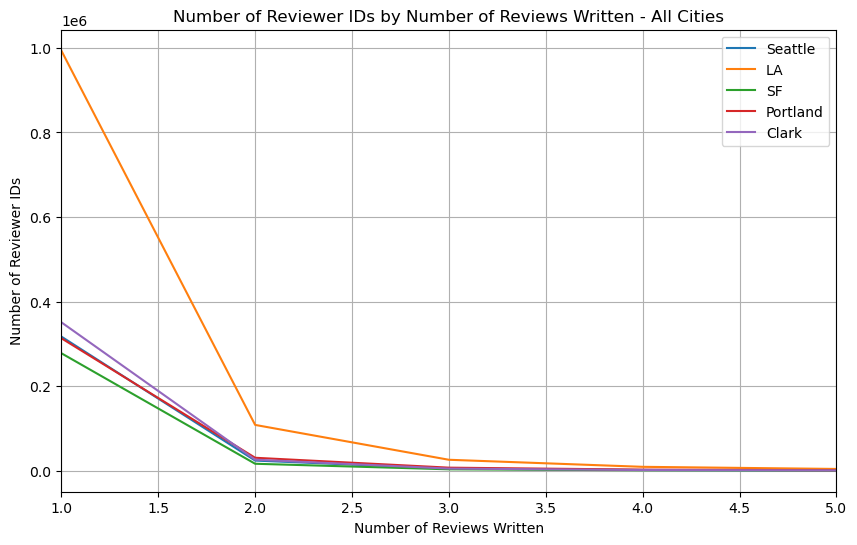

In [73]:


# Calculate the counts of reviews for each reviewer_id for all cities
review_counts_per_reviewer_1 = review_seattle['reviewer_id'].value_counts()
review_counts_per_reviewer_2 = review_la['reviewer_id'].value_counts()
review_counts_per_reviewer_3 = review_sf['reviewer_id'].value_counts()
review_counts_per_reviewer_4 = review_portland['reviewer_id'].value_counts()
review_counts_per_reviewer_5 = review_clark['reviewer_id'].value_counts()

# Aggregate these counts to find out how many reviewers have written N reviews for all cities
# This gives us the count of reviewer_ids for each review count.
aggregated_review_counts_seattle = review_counts_per_reviewer_1.value_counts().sort_index()
aggregated_review_counts_la = review_counts_per_reviewer_2.value_counts().sort_index()
aggregated_review_counts_sf = review_counts_per_reviewer_3.value_counts().sort_index()
aggregated_review_counts_portland = review_counts_per_reviewer_4.value_counts().sort_index()
aggregated_review_counts_clark = review_counts_per_reviewer_5.value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(aggregated_review_counts_seattle.index, aggregated_review_counts_seattle.values, label='Seattle')
plt.plot(aggregated_review_counts_la.index, aggregated_review_counts_la.values, label='LA')
plt.plot(aggregated_review_counts_sf.index, aggregated_review_counts_sf.values, label='SF')
plt.plot(aggregated_review_counts_portland.index, aggregated_review_counts_portland.values, label='Portland')
plt.plot(aggregated_review_counts_clark.index, aggregated_review_counts_clark.values, label='Clark')

plt.title('Number of Reviewer IDs by Number of Reviews Written - All Cities')
plt.xlabel('Number of Reviews Written')
plt.ylabel('Number of Reviewer IDs')
plt.xlim(1, 5)  # Set x-axis limit
plt.legend()
plt.grid(True)
plt.show()


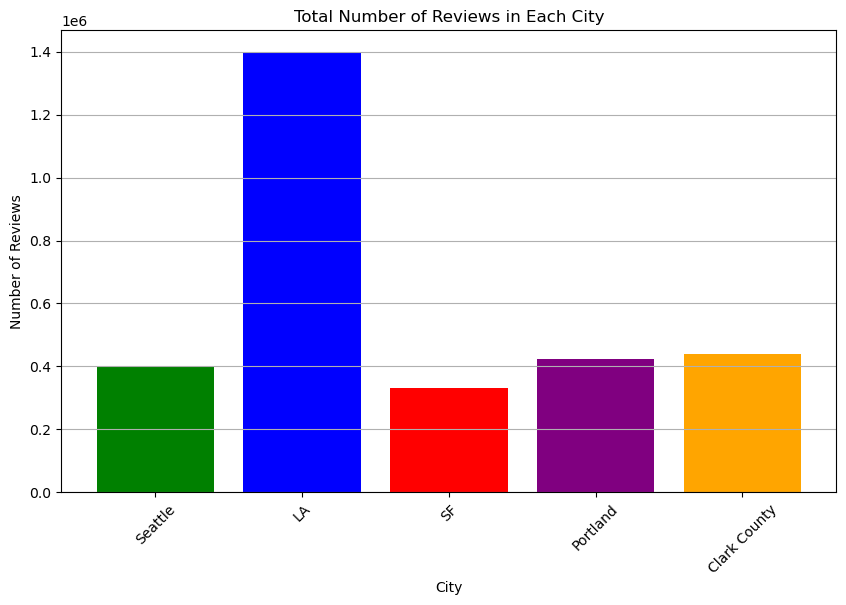

In [74]:
# Count the number of reviews for each city
total_reviews = {
    'Seattle': len(review_seattle),
    'LA': len(review_la),
    'SF': len(review_sf),
    'Portland': len(review_portland),
    'Clark County': len(review_clark)
}

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(total_reviews.keys(), total_reviews.values(), color=['green', 'blue', 'red', 'purple', 'orange'])

plt.title('Total Number of Reviews in Each City')
plt.xlabel('City')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

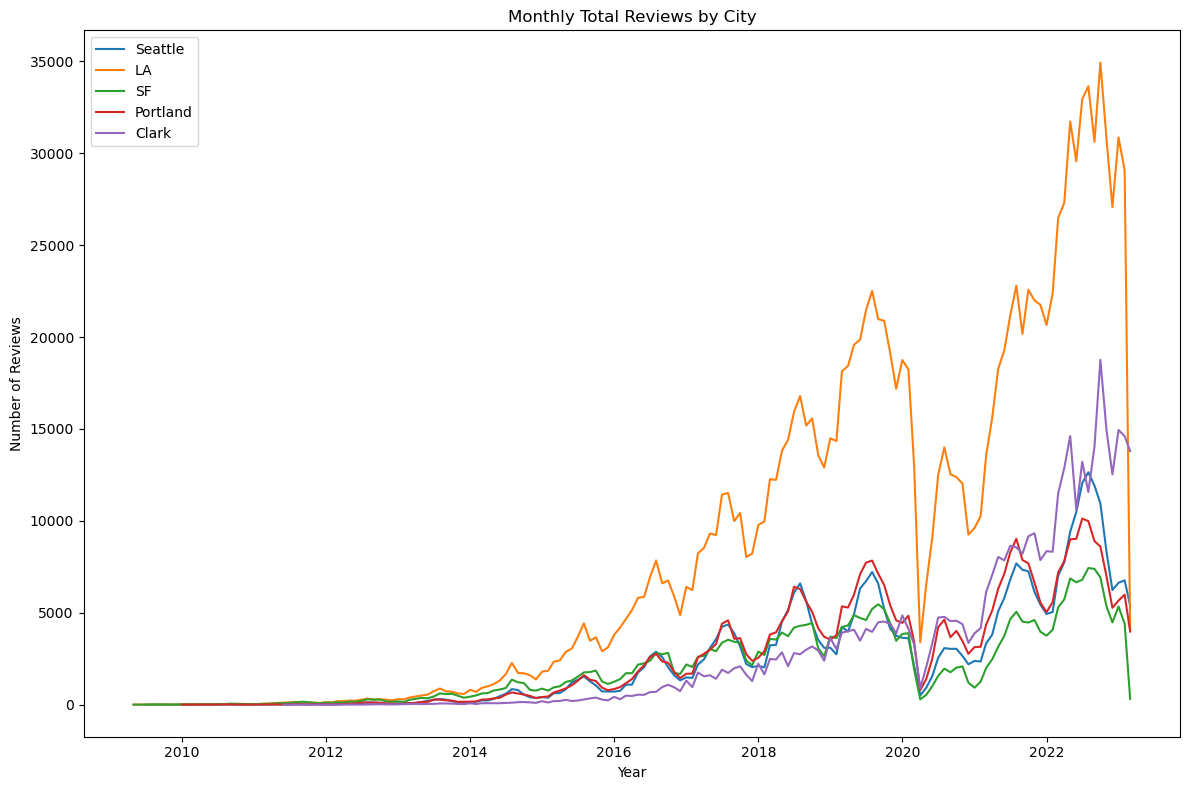

In [75]:
review_seattle['date'] = pd.to_datetime(review_seattle['date'])
review_la['date'] = pd.to_datetime(review_la['date'])
review_sf['date'] = pd.to_datetime(review_sf['date'])
review_portland['date'] = pd.to_datetime(review_portland['date'])
review_clark['date'] = pd.to_datetime(review_clark['date'])

#Group by year and month, then count the number of reviews for each city
total_reviews_per_month_seattle = review_seattle.groupby(review_seattle['date'].dt.to_period('M')).size()
total_reviews_per_month_la = review_la.groupby(review_la['date'].dt.to_period('M')).size()
total_reviews_per_month_sf = review_sf.groupby(review_sf['date'].dt.to_period('M')).size()
total_reviews_per_month_portland = review_portland.groupby(review_portland['date'].dt.to_period('M')).size()
total_reviews_per_month_clark = review_clark.groupby(review_clark['date'].dt.to_period('M')).size()

# Convert PeriodIndex back to DateTimeIndex for plotting
total_reviews_per_month_seattle.index = total_reviews_per_month_seattle.index.to_timestamp()
total_reviews_per_month_la.index = total_reviews_per_month_la.index.to_timestamp()
total_reviews_per_month_sf.index = total_reviews_per_month_sf.index.to_timestamp()
total_reviews_per_month_portland.index = total_reviews_per_month_portland.index.to_timestamp()
total_reviews_per_month_clark.index = total_reviews_per_month_clark.index.to_timestamp()

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(total_reviews_per_month_seattle.index, total_reviews_per_month_seattle.values, label='Seattle')
plt.plot(total_reviews_per_month_la.index, total_reviews_per_month_la.values, label='LA')
plt.plot(total_reviews_per_month_sf.index, total_reviews_per_month_sf.values, label='SF')
plt.plot(total_reviews_per_month_portland.index, total_reviews_per_month_portland.values, label='Portland')
plt.plot(total_reviews_per_month_clark.index, total_reviews_per_month_clark.values, label='Clark')

plt.title('Monthly Total Reviews by City')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend()
plt.tight_layout()
plt.show()

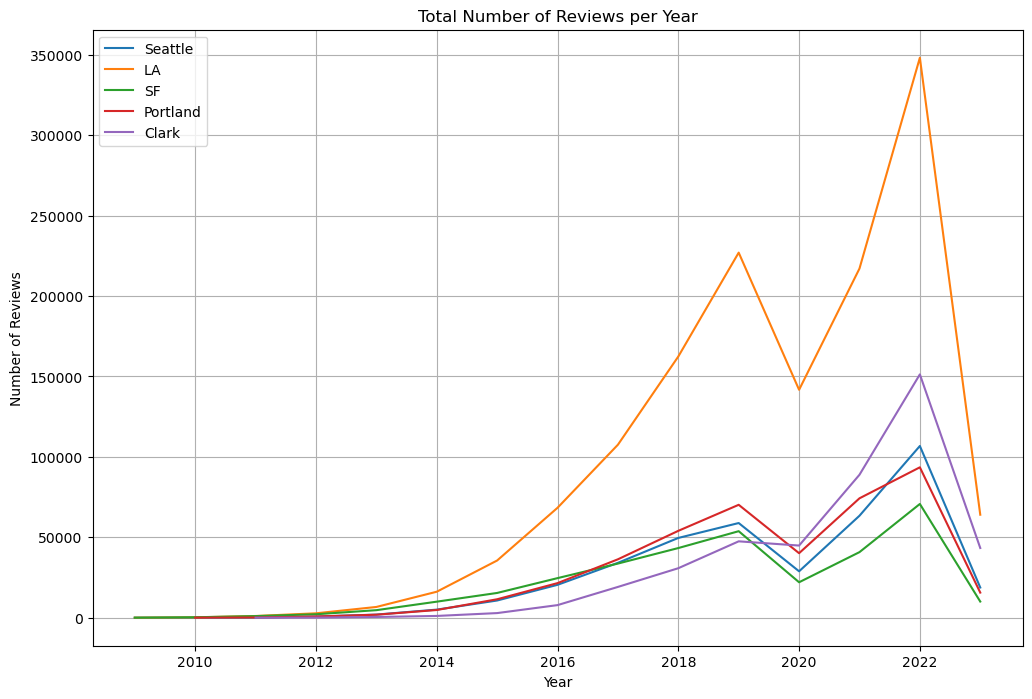

In [76]:
# Group by year and count the number of reviews for each city
total_reviews_per_year_seattle = review_seattle.groupby(review_seattle['date'].dt.year).size()
total_reviews_per_year_la = review_la.groupby(review_la['date'].dt.year).size()
total_reviews_per_year_sf = review_sf.groupby(review_sf['date'].dt.year).size()
total_reviews_per_year_portland = review_portland.groupby(review_portland['date'].dt.year).size()
total_reviews_per_year_clark = review_clark.groupby(review_clark['date'].dt.year).size()

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(total_reviews_per_year_seattle.index, total_reviews_per_year_seattle.values, label='Seattle')
plt.plot(total_reviews_per_year_la.index, total_reviews_per_year_la.values, label='LA')
plt.plot(total_reviews_per_year_sf.index, total_reviews_per_year_sf.values, label='SF')
plt.plot(total_reviews_per_year_portland.index, total_reviews_per_year_portland.values, label='Portland')
plt.plot(total_reviews_per_year_clark.index, total_reviews_per_year_clark.values, label='Clark')

plt.title('Total Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend()
plt.grid(True)
plt.show()
